## Project API Demonstration

### General Steps

    1. Extract Frame-Level Features
    2. Summarize Frame-Level Features into Video Level
    3. Get Similarity Model Features from pre-trained model and save them as the final signatures
    4. Use features from the last step to analyse Dataset and find duplicates 
    5. Visualize duplicats
        a. Unsorted vs Unsorted Distance Matrix
        b. Sample Frames from Duplicated Videos
        
    


In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
from glob import glob

In [2]:
videos = glob('/datadrive/test_dataset/**')

In [3]:
len(videos)

3843

In [16]:
# Create Video List Txt file
# with open('syria_videos.txt', 'w') as f:
#     for item in videos:
#         f.write("%s\n" % item)


In [4]:
# VIDEOS_SRC_FOLDER = '../data/external//videos'
VIDEOS_LIST = os.path.abspath('syria_videos.txt')
FRAME_LEVEL_SAVE_FOLDER = os.path.abspath('/datadrive/intermediate/frame_level')
VIDEO_LEVEL_SAVE_FOLDER = '/datadrive/intermediate/video_level'
VIDEO_SIGNATURES_SAVE_FOLDER = '/datadrive/intermediate/video_signatures'

In [5]:
VIDEOS_LIST

'/home/felipeb/winnow/notebooks/syria_videos.txt'

## Step 1 - Extract Frame-Level features

In [ ]:
from winnow.feature_extraction import IntermediateCnnExtractor

# Instantiates the extractor
extractor = IntermediateCnnExtractor(VIDEOS_LIST,FRAME_LEVEL_SAVE_FOLDER)
# Starts Extracting Frame Level Features
extractor.start(batch_size=64,cores=6)

## Step 2 - Summarize Frame-Level into Global 

In [4]:
from winnow.feature_extraction import frameToVideoRepresentation


converter = frameToVideoRepresentation(FRAME_LEVEL_SAVE_FOLDER,VIDEO_LEVEL_SAVE_FOLDER)

converter.start()

In [6]:
sample_result = np.load('/datadrive/intermediate/video_level/12bbb8b9cd78479484016e0fbabe1aae_vgg.npy')
sample_result.shape

(1, 4096)

## Step 3 - Get Similarity Model Features

In [6]:
from winnow.feature_extraction import SimilarityModel


sm = SimilarityModel()

video_signatures = sm.predict(VIDEO_LEVEL_SAVE_FOLDER)
# Save Signatires
video_signatures.shape

(3843, 4096)


(3843, 500)

## Step 4 -  Find Duplicates

In [7]:
video_signatures = np.nan_to_num(video_signatures)

In [9]:
%%time
from winnow.duplicate_detection import DuplicateDetector

detector = DuplicateDetector(distance=0.1,signatures = sm.index)

clusters = detector.find(video_signatures)

Number of Files:3843 - Number of Clusters:3613
CPU times: user 407 ms, sys: 379 ms, total: 785 ms
Wall time: 168 ms


In [10]:
video_signatures.shape

(3843, 500)

In [24]:
test_sizes = [1000,10000,100000,1000000,5000000]

In [8]:
%%time
test_sizes = [1000]
for size in test_sizes:
    print('Testing Size:{}'.format(size))
    idxs = np.random.choice([i for i in range(video_signatures.shape[0])],size=size)
    testable_sig = []
    testable_index = []
    for i in idxs:
        testable_sig.append(video_signatures[i])
        testable_index.append(sm.index[i])
    
    testable_sig =np.array(testable_sig)
    detector = DuplicateDetector(distance=0.1,signatures = np.array(testable_index))
    print('Shape of signatures submitter for testing:{}'.format(testable_sig.shape))
    detector.find(testable_sig)    
    
    

Testing Size:1000
Shape of signatures submitter for testing:(1000, 500)
Number of Files:1000 - Number of Clusters:494
CPU times: user 37.3 ms, sys: 173 µs, total: 37.5 ms
Wall time: 12.2 ms


In [9]:
%%time
test_sizes = [10000]
for size in test_sizes:
    print('Testing Size:{}'.format(size))
    idxs = np.random.choice([i for i in range(video_signatures.shape[0])],size=size)
    testable_sig = []
    testable_index = []
    for i in idxs:
        testable_sig.append(video_signatures[i])
        testable_index.append(sm.index[i])
    
    testable_sig =np.array(testable_sig)
    detector = DuplicateDetector(distance=0.1,signatures = np.array(testable_index))
    print('Shape of signatures submitter for testing:{}'.format(testable_sig.shape))
    detector.find(testable_sig)    
    

Testing Size:10000
Shape of signatures submitter for testing:(10000, 500)
Number of Files:10000 - Number of Clusters:683
CPU times: user 2.51 s, sys: 166 ms, total: 2.67 s
Wall time: 716 ms


In [13]:
%%time
test_sizes = [100000]
for size in test_sizes:
    print('Testing Size:{}'.format(size))
    idxs = np.random.choice([i for i in range(video_signatures.shape[0])],size=size)
    testable_sig = []
    testable_index = []
    for i in idxs:
        testable_sig.append(video_signatures[i])
        testable_index.append(sm.index[i])
    
    testable_sig =np.array(testable_sig)
    detector = DuplicateDetector(distance=0.2,signatures = np.array(testable_index))
    print('Shape of signatures submitter for testing:{}'.format(testable_sig.shape))
    detector.find(testable_sig)    

Testing Size:100000
Shape of signatures submitter for testing:(100000, 500)
Number of Files:100000 - Number of Clusters:958
CPU times: user 4min 21s, sys: 22min 49s, total: 27min 11s
Wall time: 21min 55s


In [ ]:
%%time
test_sizes = [100000]
for size in test_sizes:
    print('Testing Size:{}'.format(size))
    idxs = np.random.choice([i for i in range(video_signatures.shape[0])],size=size)
    testable_sig = []
    testable_index = []
    for i in idxs:
        testable_sig.append(video_signatures[i])
        testable_index.append(sm.index[i])
    
    testable_sig =np.array(testable_sig)
    detector = DuplicateDetector(distance=0.2,signatures = np.array(testable_index))
    print('Shape of signatures submitter for testing:{}'.format(testable_sig.shape))
    detector.find(testable_sig)   

Testing Size:100000
Shape of signatures submitter for testing:(100000, 500)


## Step 5 - Visualize duplicates

In [11]:
# Show number of duplicates per video cluster
detector.summary()

17      53
533      5
317      4
2772     4
1436     3
545      3
1085     3
854      3
1476     3
1684     3
378      3
834      3
1353     3
998      3
800      3
133      3
663      3
2220     3
534      3
940      3
442      3
2731     2
2218     2
284      2
285      2
981      2
1356     2
206      2
1160     2
1188     2
        ..
1090     1
3135     1
3183     1
1138     1
3187     1
1142     1
1190     1
3235     1
1186     1
3231     1
1182     1
3227     1
1178     1
3223     1
1174     1
3219     1
1170     1
3215     1
1166     1
3211     1
1162     1
3207     1
3203     1
1154     1
3199     1
1150     1
3195     1
1146     1
3191     1
2045     1
Name: cluster, Length: 3613, dtype: int64

In [12]:
test_distances = [0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4]
detectors = []
for d in test_distances:
    print('Distance:{}'.format(d))
    det = DuplicateDetector(distance=d,signatures = sm.index)
    det.find(video_signatures)
    detectors.append(det)
    

Distance:1e-05
Number of Files:3843 - Number of Clusters:3841
Distance:0.0001
Number of Files:3843 - Number of Clusters:3841
Distance:0.001
Number of Files:3843 - Number of Clusters:3840
Distance:0.01
Number of Files:3843 - Number of Clusters:3823
Distance:0.1
Number of Files:3843 - Number of Clusters:3613
Distance:0.2
Number of Files:3843 - Number of Clusters:3173
Distance:0.3
Number of Files:3843 - Number of Clusters:2096
Distance:0.4
Number of Files:3843 - Number of Clusters:1084


In [14]:
precise = detectors[-2]

In [15]:
precise.attach_source_videos(VIDEOS_LIST)

/home/felipeb/winnow/notebooks/syria_videos.txt


In [19]:
precise.df.cluster.value_counts()

5       1190
1        155
103        7
344        4
406        4
163        4
152        4
1652       4
764        4
373        4
282        4
118        4
999        4
96         4
55         4
618        3
453        3
1708       3
168        3
883        3
823        3
223        3
848        3
623        3
839        3
287        3
810        3
253        3
566        3
124        3
        ... 
605        1
533        1
563        1
535        1
537        1
539        1
541        1
543        1
545        1
547        1
549        1
551        1
555        1
557        1
559        1
569        1
599        1
573        1
575        1
579        1
581        1
583        1
585        1
587        1
589        1
591        1
593        1
595        1
597        1
2046       1
Name: cluster, Length: 2096, dtype: int64

In [20]:
test_distances = [0.00001,0.0001,0.001,0.01,0.1,0.2,0.3,0.4]

In [21]:
for i,d in enumerate(test_distances):
    precise.df['cluster_at_{}'.format(i)] = detectors[i].df['cluster']

In [ ]:
clusters_of_interest = [69, 373, 368, 114, 22]

In [46]:
precise.df[precise.df['cluster_at_4'] == 69]

signature_fp  cluster    file_name  \
70   ../data/processed/syria_videos/video_level/Y_E...       70  Y_EKUKBMgAM   
73   ../data/processed/syria_videos/video_level/-eD...       73  -eDHqQIZsDM   
296  ../data/processed/syria_videos/video_level/8Kc...      291  8Kcdz0imI0w   

                                                    fp  cluster_at_0  \
70   /home/felipe/ai/toptal/benetech/WinnowProject ...          70.0   
73   /home/felipe/ai/toptal/benetech/WinnowProject ...          73.0   
296  /home/felipe/ai/toptal/benetech/WinnowProject ...         295.0   

     cluster_at_1  cluster_at_2  cluster_at_3  cluster_at_4  cluster_at_5  \
70           70.0            70          69.0          69.0          42.0   
73           73.0            73          71.0          69.0          42.0   
296         295.0           291         287.0          69.0          42.0   

     cluster_at_6  cluster_at_7  
70            0.0           0.0  
73            0.0           0.0  
296           0.0           0.0

In [47]:
precise.df[precise.df['cluster_at_4'] == 373]

signature_fp  cluster    file_name  \
396  ../data/processed/syria_videos/video_level/Xiq...      389  XiqKBJXYqBY   
567  ../data/processed/syria_videos/video_level/sEP...      554  sEPLW6Ur-Wo   

                                                    fp  cluster_at_0  \
396  /home/felipe/ai/toptal/benetech/WinnowProject ...         395.0   
567  /home/felipe/ai/toptal/benetech/WinnowProject ...         565.0   

     cluster_at_1  cluster_at_2  cluster_at_3  cluster_at_4  cluster_at_5  \
396         395.0           389         383.0         373.0         201.0   
567         565.0           554         541.0         373.0         201.0   

     cluster_at_6  cluster_at_7  
396           0.0           0.0  
567           0.0           0.0

In [48]:
precise.df[precise.df['cluster_at_4'] == 368]

signature_fp  cluster    file_name  \
391  ../data/processed/syria_videos/video_level/OqF...      384  OqFgqrSgUhA   
655  ../data/processed/syria_videos/video_level/sNk...      636  sNkPHUySCvI   

                                                    fp  cluster_at_0  \
391  /home/felipe/ai/toptal/benetech/WinnowProject ...         390.0   
655  /home/felipe/ai/toptal/benetech/WinnowProject ...         651.0   

     cluster_at_1  cluster_at_2  cluster_at_3  cluster_at_4  cluster_at_5  \
391         390.0           384         378.0         368.0          71.0   
655         651.0           636         619.0         368.0          71.0   

     cluster_at_6  cluster_at_7  
391           0.0           0.0  
655           0.0           0.0

In [49]:
precise.df[precise.df['cluster_at_4'] == 114]

signature_fp  cluster    file_name  \
117  ../data/processed/syria_videos/video_level/daD...      117  daDtPb8epGU   
632  ../data/processed/syria_videos/video_level/UrJ...      616  UrJ1fdB4eog   

                                                    fp  cluster_at_0  \
117  /home/felipe/ai/toptal/benetech/WinnowProject ...         117.0   
632  /home/felipe/ai/toptal/benetech/WinnowProject ...         629.0   

     cluster_at_1  cluster_at_2  cluster_at_3  cluster_at_4  cluster_at_5  \
117         117.0           117         115.0         114.0         104.0   
632         629.0           616         599.0         114.0         104.0   

     cluster_at_6  cluster_at_7  
117           0.0           0.0  
632           0.0           0.0

In [50]:
precise.df[precise.df['cluster_at_4'] == 22]

signature_fp  cluster    file_name  \
22  ../data/processed/syria_videos/video_level/oMK...       22  oMKUOfz5mAM   
31  ../data/processed/syria_videos/video_level/GAC...       31  GACKH7lVn-Y   

                                                   fp  cluster_at_0  \
22  /home/felipe/ai/toptal/benetech/WinnowProject ...          22.0   
31  /home/felipe/ai/toptal/benetech/WinnowProject ...          31.0   

    cluster_at_1  cluster_at_2  cluster_at_3  cluster_at_4  cluster_at_5  \
22          22.0            22          22.0          22.0          21.0   
31          31.0            31          22.0          22.0          21.0   

    cluster_at_6  cluster_at_7  
22           0.0           0.0  
31           0.0           0.0

In [52]:
precise.df.to_csv('cluster_results.csv')

In [14]:
detector_2 = DuplicateDetector(distance=0.01,signatures = sm.index)
detector_3 = DuplicateDetector(distance=0.001,signatures = sm.index)
detector_4 = DuplicateDetector(distance=0.0001,signatures = sm.index)
detector_5 = DuplicateDetector(distance=0.00001,signatures = sm.index)
detector_6 = DuplicateDetector(distance=0.2,signatures = sm.index)
detector_7 = DuplicateDetector(distance=0.3,signatures = sm.index)

White Square should show concentrations of duplicated documents


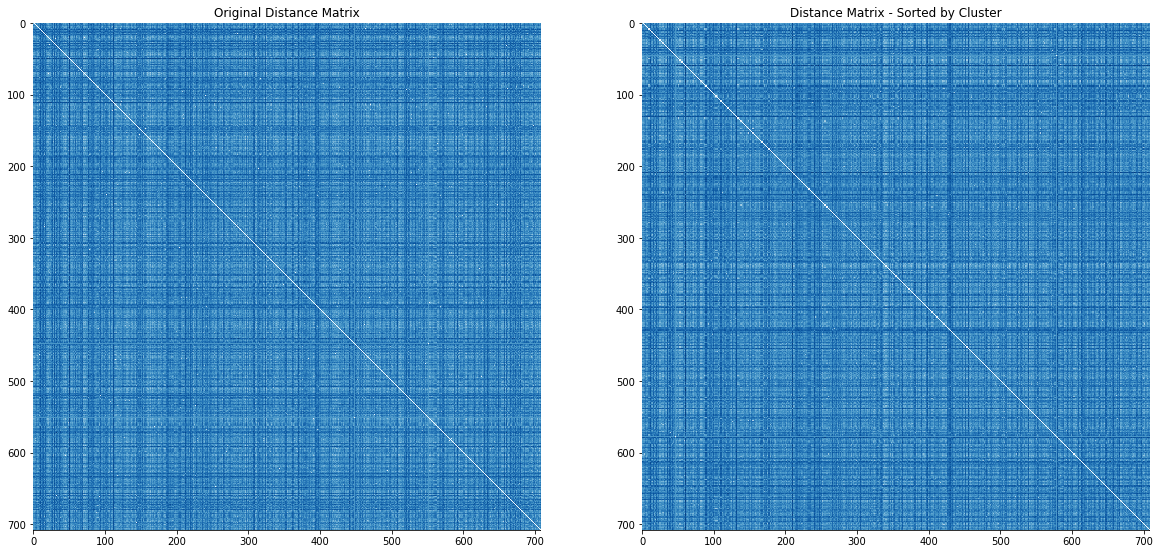

In [10]:
# Sorted vs Unsorted Matrix
detector.show_distance_matrix(comparison=True)

In [11]:
# Attach source video references 
detector.attach_source_videos(VIDEOS_LIST)

/home/felipe/ai/toptal/benetech/WinnowProject v2/winnow_project/notebooks/syria_videos.txt


In [12]:
VIDEOS_LIST

'/home/felipe/ai/toptal/benetech/WinnowProject v2/winnow_project/notebooks/syria_videos.txt'

In [13]:
# Show samples from duplicated files
detector.show_samples(indexToFilePath)

AttributeError: 'DuplicateDetector' object has no attribute 'show_samples'

In [13]:
detector.summary()

69     3
311    2
75     2
107    2
398    2
540    2
242    2
99     2
95     2
89     2
86     2
256    2
74     2
46     2
373    2
368    2
367    2
64     2
268    2
360    2
359    2
355    2
111    2
232    2
114    2
406    2
464    2
458    2
177    2
453    2
      ..
415    1
413    1
443    1
412    1
411    1
410    1
409    1
408    1
407    1
405    1
422    1
424    1
425    1
426    1
442    1
441    1
440    1
439    1
438    1
437    1
435    1
434    1
433    1
432    1
431    1
430    1
429    1
428    1
427    1
0      1
Name: cluster, Length: 646, dtype: int64

## HDBSCAN

In [6]:
import hdbscan

In [64]:
distances = [x for x in hdbscan.dist_metrics.METRIC_MAPPING if x not in ['infinity','minkowski','chebyshev','l1']]

In [65]:
distances

['euclidean',
 'l2',
 'p',
 'manhattan',
 'cityblock',
 'seuclidean',
 'mahalanobis',
 'wminkowski',
 'hamming',
 'canberra',
 'braycurtis',
 'matching',
 'jaccard',
 'dice',
 'kulsinski',
 'rogerstanimoto',
 'russellrao',
 'sokalmichener',
 'sokalsneath',
 'haversine',
 'cosine',
 'arccos',
 'pyfunc']

In [76]:
clusterer = hdbscan.RobustSingleLinkage(cut=0.1)
clusterer.fit(video_signatures)

print(clusterer.labels_.max())
print(Counter(clusterer.labels_).most_common(1))

ValueError: Buffer dtype mismatch, expected 'double_t' but got 'float'

In [63]:
for d in distances:
    clusterer = hdbscan.HDBSCAN(metric=d,min_samples=1,min_cluster_size=2,allow_single_cluster=True)
    clusterer.fit(video_signatures)
    print(d)
    print(clusterer.labels_.max())
# Counter(clusterer.labels_).most_common()

euclidean
127
l2
127
p
127
manhattan
130
cityblock
130


TypeError: __init__() takes exactly 1 positional argument (0 given)

HDBSCAN(algorithm='best', allow_single_cluster=True, alpha=1.0,
    approx_min_span_tree=True, cluster_selection_method='eom',
    core_dist_n_jobs=4, gen_min_span_tree=False, leaf_size=40,
    match_reference_implementation=False, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=2, min_samples=1, p=None,
    prediction_data=False)

In [34]:
from collections import Counter

In [37]:
clusterer.labels_.max()

127

[(-1, 376),
 (124, 11),
 (110, 10),
 (46, 7),
 (104, 5),
 (109, 4),
 (64, 4),
 (89, 4),
 (125, 4),
 (99, 4),
 (116, 4),
 (73, 4),
 (27, 4),
 (53, 4),
 (107, 4),
 (83, 3),
 (7, 3),
 (82, 3),
 (2, 3),
 (39, 3),
 (41, 3),
 (84, 3),
 (10, 3),
 (61, 3),
 (59, 3),
 (30, 3),
 (18, 3),
 (56, 3),
 (48, 3),
 (95, 3),
 (13, 3),
 (9, 3),
 (17, 3),
 (24, 3),
 (106, 3),
 (87, 3),
 (60, 3),
 (29, 3),
 (121, 3),
 (34, 3),
 (58, 3),
 (35, 3),
 (93, 3),
 (40, 3),
 (90, 3),
 (88, 3),
 (54, 2),
 (96, 2),
 (16, 2),
 (1, 2),
 (74, 2),
 (97, 2),
 (105, 2),
 (49, 2),
 (112, 2),
 (103, 2),
 (126, 2),
 (91, 2),
 (26, 2),
 (70, 2),
 (3, 2),
 (4, 2),
 (79, 2),
 (76, 2),
 (12, 2),
 (111, 2),
 (55, 2),
 (0, 2),
 (14, 2),
 (15, 2),
 (5, 2),
 (63, 2),
 (8, 2),
 (102, 2),
 (68, 2),
 (42, 2),
 (67, 2),
 (38, 2),
 (52, 2),
 (57, 2),
 (77, 2),
 (47, 2),
 (115, 2),
 (114, 2),
 (51, 2),
 (86, 2),
 (23, 2),
 (20, 2),
 (92, 2),
 (69, 2),
 (50, 2),
 (31, 2),
 (28, 2),
 (65, 2),
 (45, 2),
 (117, 2),
 (127, 2),
 (66, 2),
 (33, 

In [15]:
clusters_of_interest = detector.summary()[detector.summary() > 1].index.values

In [ ]:
for c in clusters_of_interest:
    print('CLUSTER',c)
    try:
        s = detector.show_cluster(c)
        plt.figure(figsize=(20,20))
        plt.imshow(np.vstack(s))
        plt.show()
    except as e:
        print('cluster failed',c)

 19%|█▉        | 111/580 [00:00<00:00, 1108.76frames/s]

CLUSTER 69


 10%|▉         | 46/481 [00:00<00:00, 457.24frames/s]

[(FrameTimecode(frame=20, fps=29.970030), FrameTimecode(frame=254, fps=29.970030)), (FrameTimecode(frame=254, fps=29.970030), FrameTimecode(frame=580, fps=29.970030))]


  9%|▉         | 44/481 [00:00<00:00, 439.57frames/s]

[]


100%|██████████| 481/481 [00:01<00:00, 439.81frames/s]


[]


  7%|▋         | 41/581 [00:00<00:01, 404.93frames/s]

cluster failed 69
CLUSTER 311


  9%|▉         | 44/481 [00:00<00:00, 438.33frames/s]

[(FrameTimecode(frame=20, fps=30.000000), FrameTimecode(frame=112, fps=30.000000)), (FrameTimecode(frame=112, fps=30.000000), FrameTimecode(frame=239, fps=30.000000)), (FrameTimecode(frame=239, fps=30.000000), FrameTimecode(frame=264, fps=30.000000)), (FrameTimecode(frame=264, fps=30.000000), FrameTimecode(frame=325, fps=30.000000)), (FrameTimecode(frame=325, fps=30.000000), FrameTimecode(frame=341, fps=30.000000)), (FrameTimecode(frame=341, fps=30.000000), FrameTimecode(frame=388, fps=30.000000)), (FrameTimecode(frame=388, fps=30.000000), FrameTimecode(frame=516, fps=30.000000)), (FrameTimecode(frame=516, fps=30.000000), FrameTimecode(frame=581, fps=30.000000))]


100%|██████████| 481/481 [00:01<00:00, 456.76frames/s]


[(FrameTimecode(frame=20, fps=25.000000), FrameTimecode(frame=93, fps=25.000000)), (FrameTimecode(frame=93, fps=25.000000), FrameTimecode(frame=199, fps=25.000000)), (FrameTimecode(frame=199, fps=25.000000), FrameTimecode(frame=220, fps=25.000000)), (FrameTimecode(frame=220, fps=25.000000), FrameTimecode(frame=271, fps=25.000000)), (FrameTimecode(frame=271, fps=25.000000), FrameTimecode(frame=287, fps=25.000000)), (FrameTimecode(frame=287, fps=25.000000), FrameTimecode(frame=323, fps=25.000000)), (FrameTimecode(frame=323, fps=25.000000), FrameTimecode(frame=430, fps=25.000000)), (FrameTimecode(frame=430, fps=25.000000), FrameTimecode(frame=481, fps=25.000000))]


  0%|          | 0/100 [00:00<?, ?frames/s]

cluster failed 311
CLUSTER 75
[]


  0%|          | 0/481 [00:00<?, ?frames/s]

[]
cluster failed 75
CLUSTER 107


  7%|▋         | 42/581 [00:00<00:01, 419.98frames/s]

[]


100%|██████████| 581/581 [00:01<00:00, 458.36frames/s]


[]


 10%|▉         | 46/481 [00:00<00:00, 457.69frames/s]

cluster failed 107
CLUSTER 398


  9%|▉         | 44/481 [00:00<00:00, 439.03frames/s]

[(FrameTimecode(frame=20, fps=25.000000), FrameTimecode(frame=271, fps=25.000000)), (FrameTimecode(frame=271, fps=25.000000), FrameTimecode(frame=481, fps=25.000000))]


100%|██████████| 481/481 [00:01<00:00, 462.34frames/s]


[(FrameTimecode(frame=20, fps=25.000000), FrameTimecode(frame=271, fps=25.000000)), (FrameTimecode(frame=271, fps=25.000000), FrameTimecode(frame=481, fps=25.000000))]


  7%|▋         | 42/581 [00:00<00:01, 412.29frames/s]

cluster failed 398
CLUSTER 540


  7%|▋         | 42/581 [00:00<00:01, 414.91frames/s]

[(FrameTimecode(frame=20, fps=30.000000), FrameTimecode(frame=54, fps=30.000000)), (FrameTimecode(frame=54, fps=30.000000), FrameTimecode(frame=89, fps=30.000000)), (FrameTimecode(frame=89, fps=30.000000), FrameTimecode(frame=151, fps=30.000000)), (FrameTimecode(frame=151, fps=30.000000), FrameTimecode(frame=176, fps=30.000000)), (FrameTimecode(frame=176, fps=30.000000), FrameTimecode(frame=212, fps=30.000000)), (FrameTimecode(frame=212, fps=30.000000), FrameTimecode(frame=237, fps=30.000000)), (FrameTimecode(frame=237, fps=30.000000), FrameTimecode(frame=363, fps=30.000000)), (FrameTimecode(frame=363, fps=30.000000), FrameTimecode(frame=582, fps=30.000000)), (FrameTimecode(frame=582, fps=30.000000), FrameTimecode(frame=581, fps=30.000000))]


100%|██████████| 581/581 [00:01<00:00, 428.92frames/s]


[(FrameTimecode(frame=20, fps=30.000000), FrameTimecode(frame=54, fps=30.000000)), (FrameTimecode(frame=54, fps=30.000000), FrameTimecode(frame=89, fps=30.000000)), (FrameTimecode(frame=89, fps=30.000000), FrameTimecode(frame=151, fps=30.000000)), (FrameTimecode(frame=151, fps=30.000000), FrameTimecode(frame=176, fps=30.000000)), (FrameTimecode(frame=176, fps=30.000000), FrameTimecode(frame=212, fps=30.000000)), (FrameTimecode(frame=212, fps=30.000000), FrameTimecode(frame=237, fps=30.000000)), (FrameTimecode(frame=237, fps=30.000000), FrameTimecode(frame=363, fps=30.000000)), (FrameTimecode(frame=363, fps=30.000000), FrameTimecode(frame=582, fps=30.000000)), (FrameTimecode(frame=582, fps=30.000000), FrameTimecode(frame=581, fps=30.000000))]


  7%|▋         | 43/581 [00:00<00:01, 422.92frames/s]

cluster failed 540
CLUSTER 242


  8%|▊         | 44/581 [00:00<00:01, 437.94frames/s]

[]


100%|██████████| 581/581 [00:01<00:00, 445.55frames/s]


[]


  9%|▉         | 43/481 [00:00<00:01, 429.52frames/s]

cluster failed 242
CLUSTER 99


 73%|███████▎  | 353/481 [00:00<00:00, 437.68frames/s]

In [ ]:
s = detector.show_cluster(69)

In [18]:
import matplotlib.pyplot as plt

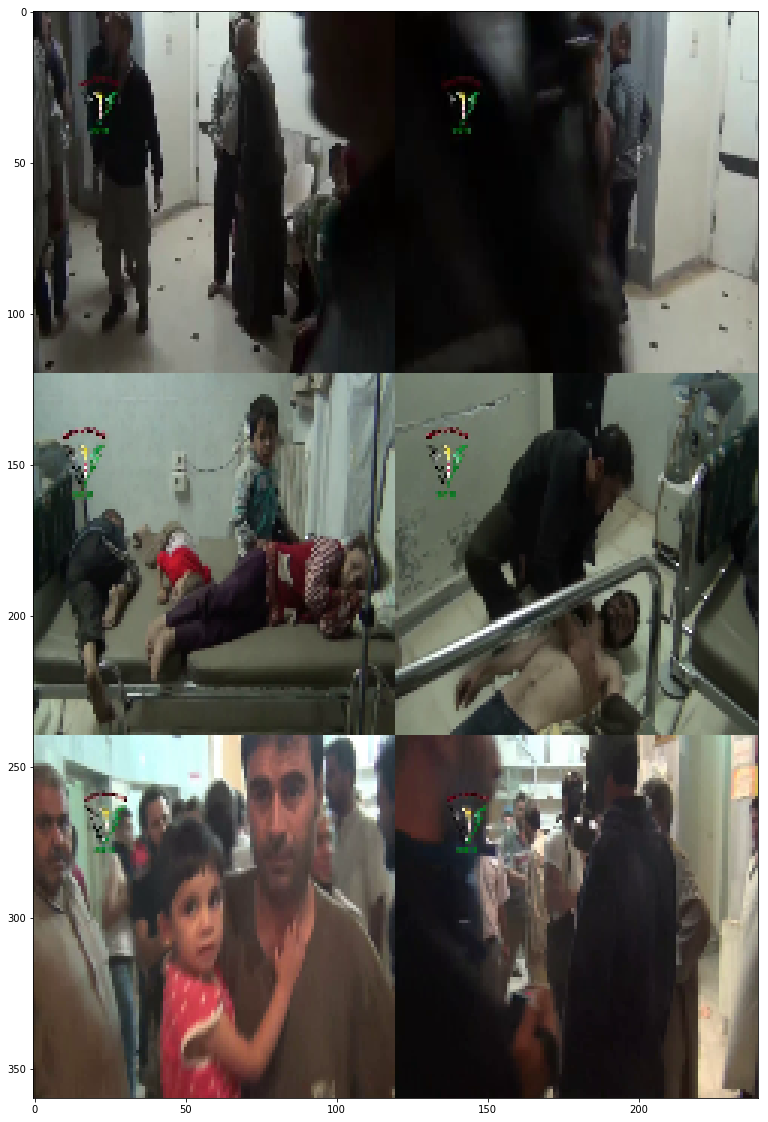

In [23]:
plt.figure(figsize=(20,20))
plt.imshow(np.vstack(s))

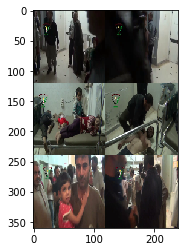

In [15]:
%debug

> /home/felipe/anaconda3/lib/python3.6/site-packages/numpy/core/shape_base.py(288)hstack()
    286         return _nx.concatenate(arrs, 0)
    287     else:
--> 288         return _nx.concatenate(arrs, 1)
    289 
    290 



ipdb>  up


> /home/felipe/ai/toptal/benetech/WinnowProject v2/winnow_project/winnow/duplicate_detection/scene_summary.py(77)get_video_summary_list()
     75         clip = VideoFileClip(vid)
     76         frames = [Image.fromarray(f).resize((120,120)) for i,f in enumerate(clip.iter_frames()) if i in frame_list]
---> 77         summaries.append(np.hstack(frames))
     78 
     79     return summaries



ipdb>  frames


[]


ipdb>  frame_list


[]


ipdb>  scene_descriptors


*** NameError: name 'scene_descriptors' is not defined


ipdb>  scenes_descriptors


[[], [], [(FrameTimecode(frame=20, fps=29.970030), FrameTimecode(frame=254, fps=29.970030)), (FrameTimecode(frame=254, fps=29.970030), FrameTimecode(frame=580, fps=29.970030))]]


ipdb>  exit()


In [17]:
SYRIA_VIDEOS = np.array(glob(os.path.abspath('../data/external/SYRIA_VIDEOS/**')))
len(SYRIA_VIDEOS)
np.savetxt('syria_videos.txt',SYRIA_VIDEOS,fmt='%s')

In [18]:
import pandas as pd

In [19]:
results_df = pd.DataFrame({'signature_fp':sm.index,'cluster':clustes})

In [20]:
syria_list = pd.read_csv('syria_videos.txt',header=None,names=['fp'])
syria_list.head()

fp
0  /home/felipe/ai/toptal/benetech/WinnowProject ...
1  /home/felipe/ai/toptal/benetech/WinnowProject ...
2  /home/felipe/ai/toptal/benetech/WinnowProject ...
3  /home/felipe/ai/toptal/benetech/WinnowProject ...
4  /home/felipe/ai/toptal/benetech/WinnowProject ...

In [21]:
syria_list['file_name'] = syria_list['fp'].apply(lambda x:x.split('/')[-1].split('.')[0])

In [22]:
syria_list.head()

fp    file_name
0  /home/felipe/ai/toptal/benetech/WinnowProject ...  TJjz-u29kFI
1  /home/felipe/ai/toptal/benetech/WinnowProject ...  km0hDl-1Y2w
2  /home/felipe/ai/toptal/benetech/WinnowProject ...  96z1ePXyzqM
3  /home/felipe/ai/toptal/benetech/WinnowProject ...  gbtg8WrbRvI
4  /home/felipe/ai/toptal/benetech/WinnowProject ...  7fkluR69wUg

In [23]:
results_df.head()

signature_fp  cluster
0  ../data/processed/syria_videos/video_level/hQf...        0
1  ../data/processed/syria_videos/video_level/2DC...        1
2  ../data/processed/syria_videos/video_level/Y6I...        2
3  ../data/processed/syria_videos/video_level/zEu...        3
4  ../data/processed/syria_videos/video_level/IAX...        4

In [48]:
results_df['file_name'] = results_df['signature_fp'].apply(lambda x:x.split('/')[-1].split('.')[0].split('_vgg')[0])

In [49]:
results_df.head()

signature_fp  cluster    file_name
0  ../data/processed/syria_videos/video_level/hQf...        0  hQfT_UIYYB4
1  ../data/processed/syria_videos/video_level/2DC...        1  2DCpxpgvKjE
2  ../data/processed/syria_videos/video_level/Y6I...        2  Y6IfWwr4ZOU
3  ../data/processed/syria_videos/video_level/zEu...        3  zEutXW563Hk
4  ../data/processed/syria_videos/video_level/IAX...        4  IAXHMJLxZ_I

In [50]:
merged = results_df.merge(syria_list,on='file_name')

In [53]:
merged.head()

signature_fp  cluster    file_name  \
0  ../data/processed/syria_videos/video_level/hQf...        0  hQfT_UIYYB4   
1  ../data/processed/syria_videos/video_level/2DC...        1  2DCpxpgvKjE   
2  ../data/processed/syria_videos/video_level/Y6I...        2  Y6IfWwr4ZOU   
3  ../data/processed/syria_videos/video_level/zEu...        3  zEutXW563Hk   
4  ../data/processed/syria_videos/video_level/IAX...        4  IAXHMJLxZ_I   

                                                  fp  
0  /home/felipe/ai/toptal/benetech/WinnowProject ...  
1  /home/felipe/ai/toptal/benetech/WinnowProject ...  
2  /home/felipe/ai/toptal/benetech/WinnowProject ...  
3  /home/felipe/ai/toptal/benetech/WinnowProject ...  
4  /home/felipe/ai/toptal/benetech/WinnowProject ...

In [51]:
merged.shape

(709, 4)

In [67]:
per_cluster = merged['cluster'].value_counts() 
clusters_of_interest = per_cluster[per_cluster > 1].index.values

In [80]:
for c in clusters_of_interest[9:]:
    sample_videos = merged.loc[merged['cluster'] == c]['fp'].values
    clip1 = VideoFileClip(sample_videos[0]).margin(10) # add 10px contour
    clip2 = VideoFileClip(sample_videos[1])
    final_clip = clips_array([[clip1, clip2]])
    final_clip.resize(width=480).write_videofile("cluster_{}.mp4".format(c))
    
    
    

[MoviePy] >>>> Building video cluster_89.mp4
[MoviePy] Writing audio in cluster_89TEMP_MPY_wvf_snd.mp3




  0%|          | 0/3823 [00:00<?, ?it/s]

  4%|▍         | 152/3823 [00:00<00:02, 1462.77it/s]

  8%|▊         | 305/3823 [00:00<00:02, 1477.79it/s]

 13%|█▎        | 507/3823 [00:00<00:02, 1607.05it/s]

 18%|█▊        | 701/3823 [00:00<00:01, 1694.10it/s]

 22%|██▏       | 859/3823 [00:00<00:01, 1657.07it/s]

 27%|██▋       | 1029/3823 [00:00<00:01, 1668.31it/s]

 32%|███▏      | 1213/3823 [00:00<00:01, 1715.58it/s]

 36%|███▌      | 1375/3823 [00:00<00:01, 1650.13it/s]

 40%|████      | 1544/3823 [00:00<00:01, 1661.48it/s]

 45%|████▍     | 1714/3823 [00:01<00:01, 1672.03it/s]

 49%|████▉     | 1878/3823 [00:01<00:01, 1614.96it/s]

 54%|█████▍    | 2071/3823 [00:01<00:01, 1697.82it/s]

 59%|█████▊    | 2241/3823 [00:01<00:00, 1667.09it/s]

 64%|██████▎   | 2432/3823 [00:01<00:00, 1732.97it/s]

 68%|██████▊   | 2606/3823 [00:01<00:00, 1718.57it/s]

 73%|███████▎  | 2804/3823 [00:01<00:00, 1775.25it/s]

 78%|███████▊  | 2988/3823 [00:01<00:00, 1791.87it/s]

 83%|████████▎ | 3168/3823

[MoviePy] Done.
[MoviePy] Writing video cluster_89.mp4




  0%|          | 0/4335 [00:00<?, ?it/s]

  0%|          | 2/4335 [00:00<04:34, 15.77it/s]

  0%|          | 4/4335 [00:00<04:30, 15.99it/s]

  0%|          | 6/4335 [00:00<04:28, 16.14it/s]

  0%|          | 8/4335 [00:00<04:27, 16.20it/s]

  0%|          | 10/4335 [00:00<04:21, 16.52it/s]

  0%|          | 12/4335 [00:00<04:22, 16.47it/s]

  0%|          | 14/4335 [00:00<04:20, 16.57it/s]

  0%|          | 16/4335 [00:00<04:19, 16.66it/s]

  0%|          | 18/4335 [00:01<04:20, 16.60it/s]

  0%|          | 20/4335 [00:01<04:23, 16.39it/s]

  1%|          | 22/4335 [00:01<04:23, 16.34it/s]

  1%|          | 24/4335 [00:01<04:26, 16.16it/s]

  1%|          | 26/4335 [00:01<04:30, 15.94it/s]

  1%|          | 28/4335 [00:01<04:31, 15.88it/s]

  1%|          | 30/4335 [00:01<04:30, 15.94it/s]

  1%|          | 32/4335 [00:01<04:25, 16.19it/s]

  1%|          | 34/4335 [00:02<04:31, 15.85it/s]

  1%|          | 36/4335 [00:02<04:33, 15.72it/s]

  1%|          | 38/4335 [00:02<04:33, 15.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_89.mp4 

[MoviePy] >>>> Building video cluster_86.mp4
[MoviePy] Writing audio in cluster_86TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1436 [00:00<?, ?it/s]

 11%|█         | 161/1436 [00:00<00:00, 1605.83it/s]

 25%|██▍       | 356/1436 [00:00<00:00, 1678.31it/s]

 39%|███▉      | 560/1436 [00:00<00:00, 1764.72it/s]

 52%|█████▏    | 752/1436 [00:00<00:00, 1807.45it/s]

 66%|██████▌   | 947/1436 [00:00<00:00, 1846.07it/s]

 80%|████████  | 1149/1436 [00:00<00:00, 1892.36it/s]

 92%|█████████▏| 1321/1436 [00:00<00:00, 1786.86it/s]

100%|██████████| 1436/1436 [00:00<00:00, 1807.63it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_86.mp4




  0%|          | 0/1954 [00:00<?, ?it/s]

  0%|          | 7/1954 [00:00<00:28, 67.46it/s]

  1%|          | 14/1954 [00:00<00:28, 67.65it/s]

  1%|          | 22/1954 [00:00<00:27, 69.36it/s]

  2%|▏         | 30/1954 [00:00<00:27, 70.28it/s]

  2%|▏         | 38/1954 [00:00<00:26, 71.45it/s]

  2%|▏         | 46/1954 [00:00<00:26, 71.98it/s]

  3%|▎         | 54/1954 [00:00<00:26, 71.70it/s]

  3%|▎         | 61/1954 [00:00<00:27, 69.25it/s]

  4%|▎         | 69/1954 [00:00<00:26, 70.14it/s]

  4%|▍         | 76/1954 [00:01<00:27, 67.71it/s]

  4%|▍         | 83/1954 [00:01<00:27, 67.06it/s]

  5%|▍         | 90/1954 [00:01<00:27, 67.84it/s]

  5%|▍         | 97/1954 [00:01<00:27, 67.86it/s]

  5%|▌         | 105/1954 [00:01<00:26, 68.96it/s]

  6%|▌         | 112/1954 [00:01<00:26, 68.38it/s]

  6%|▌         | 119/1954 [00:01<00:27, 67.61it/s]

  6%|▋         | 126/1954 [00:01<00:27, 66.85it/s]

  7%|▋         | 133/1954 [00:01<00:27, 66.84it/s]

  7%|▋         | 140/1954 [00:02<0

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_86.mp4 

[MoviePy] >>>> Building video cluster_256.mp4
[MoviePy] Writing audio in cluster_256TEMP_MPY_wvf_snd.mp3




  0%|          | 0/3178 [00:00<?, ?it/s]

  4%|▎         | 114/3178 [00:00<00:02, 1138.33it/s]

  8%|▊         | 254/3178 [00:00<00:02, 1191.04it/s]

 12%|█▏        | 397/3178 [00:00<00:02, 1253.26it/s]

 17%|█▋        | 540/3178 [00:00<00:02, 1300.96it/s]

 21%|██▏       | 682/3178 [00:00<00:01, 1332.72it/s]

 26%|██▌       | 828/3178 [00:00<00:01, 1367.94it/s]

 31%|███       | 981/3178 [00:00<00:01, 1410.79it/s]

 35%|███▌      | 1121/3178 [00:00<00:01, 1386.82it/s]

 40%|███▉      | 1269/3178 [00:00<00:01, 1413.15it/s]

 45%|████▍     | 1419/3178 [00:01<00:01, 1434.74it/s]

 49%|████▉     | 1560/3178 [00:01<00:01, 1352.22it/s]

 55%|█████▍    | 1733/3178 [00:01<00:00, 1445.26it/s]

 65%|██████▌   | 2072/3178 [00:01<00:00, 1745.39it/s]

 75%|███████▍  | 2371/3178 [00:01<00:00, 1993.71it/s]

 84%|████████▍ | 2681/3178 [00:01<00:00, 2232.08it/s]

 95%|█████████▍| 3010/3178 [00:01<00:00, 2470.38it/s]

100%|██████████| 3178/3178 [00:01<00:00, 1882.55it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_256.mp4




  0%|          | 0/3603 [00:00<?, ?it/s]

  0%|          | 2/3603 [00:00<03:43, 16.08it/s]

  0%|          | 4/3603 [00:00<03:43, 16.08it/s]

  0%|          | 6/3603 [00:00<03:43, 16.08it/s]

  0%|          | 8/3603 [00:00<03:48, 15.76it/s]

  0%|          | 10/3603 [00:00<03:46, 15.88it/s]

  0%|          | 12/3603 [00:00<03:44, 16.01it/s]

  0%|          | 14/3603 [00:00<03:44, 15.97it/s]

  0%|          | 16/3603 [00:01<03:43, 16.08it/s]

  0%|          | 18/3603 [00:01<03:44, 15.94it/s]

  1%|          | 20/3603 [00:01<03:43, 16.03it/s]

  1%|          | 22/3603 [00:01<03:47, 15.75it/s]

  1%|          | 24/3603 [00:01<03:43, 15.98it/s]

  1%|          | 26/3603 [00:01<03:41, 16.16it/s]

  1%|          | 28/3603 [00:01<03:40, 16.20it/s]

  1%|          | 30/3603 [00:01<03:41, 16.15it/s]

  1%|          | 32/3603 [00:01<03:39, 16.25it/s]

  1%|          | 34/3603 [00:02<03:46, 15.79it/s]

  1%|          | 36/3603 [00:02<03:45, 15.81it/s]

  1%|          | 38/3603 [00:02<03:45, 15.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_256.mp4 

[MoviePy] >>>> Building video cluster_74.mp4
[MoviePy] Writing audio in cluster_74TEMP_MPY_wvf_snd.mp3




  0%|          | 0/656 [00:00<?, ?it/s]

 20%|██        | 133/656 [00:00<00:00, 1329.77it/s]

 44%|████▍     | 287/656 [00:00<00:00, 1385.47it/s]

 68%|██████▊   | 446/656 [00:00<00:00, 1440.89it/s]

 91%|█████████ | 598/656 [00:00<00:00, 1459.45it/s]

100%|██████████| 656/656 [00:00<00:00, 1487.41it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_74.mp4




  0%|          | 0/892 [00:00<?, ?it/s]

  0%|          | 2/892 [00:00<00:56, 15.67it/s]

  0%|          | 4/892 [00:00<00:56, 15.79it/s]

  1%|          | 6/892 [00:00<00:55, 15.92it/s]

  1%|          | 8/892 [00:00<00:55, 16.03it/s]

  1%|          | 10/892 [00:00<00:55, 15.83it/s]

  1%|▏         | 12/892 [00:00<00:55, 15.75it/s]

  2%|▏         | 14/892 [00:00<00:56, 15.44it/s]

  2%|▏         | 16/892 [00:01<00:55, 15.69it/s]

  2%|▏         | 18/892 [00:01<00:55, 15.69it/s]

  2%|▏         | 20/892 [00:01<00:55, 15.85it/s]

  2%|▏         | 22/892 [00:01<00:54, 15.96it/s]

  3%|▎         | 24/892 [00:01<00:56, 15.47it/s]

  3%|▎         | 26/892 [00:01<00:55, 15.55it/s]

  3%|▎         | 28/892 [00:01<00:55, 15.70it/s]

  3%|▎         | 30/892 [00:01<00:55, 15.45it/s]

  4%|▎         | 32/892 [00:02<00:55, 15.36it/s]

  4%|▍         | 34/892 [00:02<00:55, 15.43it/s]

  4%|▍         | 36/892 [00:02<00:55, 15.52it/s]

  4%|▍         | 38/892 [00:02<00:54, 15.71it/s]

  4%|▍     

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_74.mp4 

[MoviePy] >>>> Building video cluster_46.mp4
[MoviePy] Writing audio in cluster_46TEMP_MPY_wvf_snd.mp3




  0%|          | 0/932 [00:00<?, ?it/s]

 11%|█▏        | 106/932 [00:00<00:00, 1058.46it/s]

 24%|██▍       | 226/932 [00:00<00:00, 1095.81it/s]

 38%|███▊      | 356/932 [00:00<00:00, 1146.78it/s]

 54%|█████▍    | 506/932 [00:00<00:00, 1233.68it/s]

 69%|██████▊   | 639/932 [00:00<00:00, 1261.04it/s]

 82%|████████▏ | 768/932 [00:00<00:00, 1269.22it/s]

 96%|█████████▌| 895/932 [00:00<00:00, 1266.62it/s]

100%|██████████| 932/932 [00:00<00:00, 1272.42it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_46.mp4




  0%|          | 0/1268 [00:00<?, ?it/s]

  0%|          | 2/1268 [00:00<01:16, 16.52it/s]

  0%|          | 4/1268 [00:00<01:16, 16.42it/s]

  0%|          | 6/1268 [00:00<01:20, 15.61it/s]

  1%|          | 8/1268 [00:00<01:21, 15.45it/s]

  1%|          | 10/1268 [00:00<01:20, 15.71it/s]

  1%|          | 12/1268 [00:00<01:19, 15.75it/s]

  1%|          | 14/1268 [00:00<01:21, 15.46it/s]

  1%|▏         | 16/1268 [00:01<01:21, 15.37it/s]

  1%|▏         | 18/1268 [00:01<01:21, 15.29it/s]

  2%|▏         | 20/1268 [00:01<01:22, 15.06it/s]

  2%|▏         | 22/1268 [00:01<01:23, 15.00it/s]

  2%|▏         | 24/1268 [00:01<01:21, 15.27it/s]

  2%|▏         | 26/1268 [00:01<01:20, 15.43it/s]

  2%|▏         | 28/1268 [00:01<01:19, 15.68it/s]

  2%|▏         | 30/1268 [00:01<01:18, 15.78it/s]

  3%|▎         | 32/1268 [00:02<01:18, 15.76it/s]

  3%|▎         | 34/1268 [00:02<01:17, 15.92it/s]

  3%|▎         | 36/1268 [00:02<01:17, 15.93it/s]

  3%|▎         | 38/1268 [00:02<01:17, 15.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_46.mp4 

[MoviePy] >>>> Building video cluster_373.mp4
[MoviePy] Writing audio in cluster_373TEMP_MPY_wvf_snd.mp3




  0%|          | 0/2320 [00:00<?, ?it/s]

  5%|▍         | 111/2320 [00:00<00:01, 1109.29it/s]

 11%|█         | 254/2320 [00:00<00:01, 1185.64it/s]

 17%|█▋        | 401/2320 [00:00<00:01, 1258.26it/s]

 23%|██▎       | 535/2320 [00:00<00:01, 1279.96it/s]

 28%|██▊       | 650/2320 [00:00<00:01, 1235.91it/s]

 34%|███▍      | 786/2320 [00:00<00:01, 1270.51it/s]

 40%|████      | 936/2320 [00:00<00:01, 1329.26it/s]

 47%|████▋     | 1086/2320 [00:00<00:00, 1375.19it/s]

 53%|█████▎    | 1223/2320 [00:00<00:00, 1352.00it/s]

 59%|█████▊    | 1362/2320 [00:01<00:00, 1361.60it/s]

 65%|██████▍   | 1504/2320 [00:01<00:00, 1376.90it/s]

 71%|███████   | 1641/2320 [00:01<00:00, 1363.80it/s]

 77%|███████▋  | 1784/2320 [00:01<00:00, 1379.06it/s]

 83%|████████▎ | 1933/2320 [00:01<00:00, 1408.18it/s]

 89%|████████▉ | 2074/2320 [00:01<00:00, 1393.72it/s]

 96%|█████████▌| 2229/2320 [00:01<00:00, 1434.76it/s]

100%|██████████| 2320/2320 [00:01<00:00, 1383.46it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_373.mp4




  0%|          | 0/2631 [00:00<?, ?it/s]

  0%|          | 2/2631 [00:00<02:47, 15.73it/s]

  0%|          | 4/2631 [00:00<02:43, 16.11it/s]

  0%|          | 6/2631 [00:00<02:40, 16.36it/s]

  0%|          | 8/2631 [00:00<02:43, 16.06it/s]

  0%|          | 10/2631 [00:00<02:41, 16.19it/s]

  0%|          | 12/2631 [00:00<02:40, 16.35it/s]

  1%|          | 14/2631 [00:00<02:40, 16.29it/s]

  1%|          | 16/2631 [00:00<02:41, 16.20it/s]

  1%|          | 18/2631 [00:01<02:38, 16.48it/s]

  1%|          | 20/2631 [00:01<02:37, 16.53it/s]

  1%|          | 22/2631 [00:01<02:36, 16.71it/s]

  1%|          | 24/2631 [00:01<02:34, 16.86it/s]

  1%|          | 26/2631 [00:01<02:35, 16.72it/s]

  1%|          | 28/2631 [00:01<02:35, 16.79it/s]

  1%|          | 30/2631 [00:01<02:36, 16.59it/s]

  1%|          | 32/2631 [00:01<02:37, 16.49it/s]

  1%|▏         | 34/2631 [00:02<02:38, 16.42it/s]

  1%|▏         | 36/2631 [00:02<02:38, 16.42it/s]

  1%|▏         | 38/2631 [00:02<02:39, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_373.mp4 

[MoviePy] >>>> Building video cluster_368.mp4
[MoviePy] Writing audio in cluster_368TEMP_MPY_wvf_snd.mp3




  0%|          | 0/6778 [00:00<?, ?it/s]

  2%|▏         | 152/6778 [00:00<00:04, 1514.75it/s]

  6%|▌         | 378/6778 [00:00<00:03, 1680.66it/s]

  9%|▊         | 590/6778 [00:00<00:03, 1791.93it/s]

 11%|█         | 761/6778 [00:00<00:03, 1766.28it/s]

 14%|█▍        | 958/6778 [00:00<00:03, 1810.35it/s]

 17%|█▋        | 1176/6778 [00:00<00:02, 1906.59it/s]

 20%|██        | 1361/6778 [00:00<00:02, 1871.10it/s]

 23%|██▎       | 1539/6778 [00:00<00:02, 1788.98it/s]

 25%|██▌       | 1725/6778 [00:00<00:02, 1808.48it/s]

 28%|██▊       | 1902/6778 [00:01<00:02, 1754.13it/s]

 31%|███       | 2116/6778 [00:01<00:02, 1848.41it/s]

 35%|███▍      | 2339/6778 [00:01<00:02, 1947.73it/s]

 38%|███▊      | 2552/6778 [00:01<00:02, 1998.97it/s]

 41%|████      | 2771/6778 [00:01<00:01, 2044.77it/s]

 44%|████▍     | 2985/6778 [00:01<00:01, 2071.30it/s]

 47%|████▋     | 3193/6778 [00:01<00:01, 2049.08it/s]

 51%|█████     | 3439/6778 [00:01<00:01, 2156.04it/s]

 55%|█████▍    | 3703/6778

[MoviePy] Done.
[MoviePy] Writing video cluster_368.mp4




  0%|          | 0/9222 [00:00<?, ?it/s]

  0%|          | 7/9222 [00:00<02:12, 69.33it/s]

  0%|          | 14/9222 [00:00<02:14, 68.22it/s]

  0%|          | 21/9222 [00:00<02:14, 68.40it/s]

  0%|          | 28/9222 [00:00<02:16, 67.52it/s]

  0%|          | 35/9222 [00:00<02:15, 67.99it/s]

  0%|          | 42/9222 [00:00<02:14, 68.43it/s]

  1%|          | 49/9222 [00:00<02:14, 68.27it/s]

  1%|          | 56/9222 [00:00<02:16, 67.14it/s]

  1%|          | 63/9222 [00:00<02:18, 66.31it/s]

  1%|          | 70/9222 [00:01<02:19, 65.69it/s]

  1%|          | 77/9222 [00:01<02:23, 63.73it/s]

  1%|          | 84/9222 [00:01<02:23, 63.49it/s]

  1%|          | 91/9222 [00:01<02:21, 64.73it/s]

  1%|          | 98/9222 [00:01<02:21, 64.29it/s]

  1%|          | 105/9222 [00:01<02:22, 63.80it/s]

  1%|          | 112/9222 [00:01<02:21, 64.40it/s]

  1%|▏         | 119/9222 [00:01<02:20, 64.93it/s]

  1%|▏         | 126/9222 [00:01<02:19, 65.34it/s]

  1%|▏         | 133/9222 [00:02<02

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_368.mp4 

[MoviePy] >>>> Building video cluster_367.mp4
[MoviePy] Writing audio in cluster_367TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1990 [00:00<?, ?it/s]

  5%|▌         | 100/1990 [00:00<00:01, 987.15it/s]

 10%|█         | 203/1990 [00:00<00:01, 992.88it/s]

 17%|█▋        | 334/1990 [00:00<00:01, 1068.88it/s]

 23%|██▎       | 458/1990 [00:00<00:01, 1105.09it/s]

 30%|██▉       | 592/1990 [00:00<00:01, 1164.32it/s]

 36%|███▌      | 713/1990 [00:00<00:01, 1161.64it/s]

 43%|████▎     | 851/1990 [00:00<00:00, 1217.78it/s]

 50%|████▉     | 991/1990 [00:00<00:00, 1266.19it/s]

 56%|█████▌    | 1114/1990 [00:00<00:00, 1227.18it/s]

 62%|██████▏   | 1239/1990 [00:01<00:00, 1233.54it/s]

 69%|██████▊   | 1366/1990 [00:01<00:00, 1243.51it/s]

 75%|███████▍  | 1490/1990 [00:01<00:00, 1212.52it/s]

 82%|████████▏ | 1631/1990 [00:01<00:00, 1256.60it/s]

 89%|████████▉ | 1775/1990 [00:01<00:00, 1304.09it/s]

 96%|█████████▌| 1906/1990 [00:01<00:00, 1276.56it/s]

100%|██████████| 1990/1990 [00:01<00:00, 1231.32it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_367.mp4




  0%|          | 0/2707 [00:00<?, ?it/s]

  0%|          | 2/2707 [00:00<02:36, 17.33it/s]

  0%|          | 4/2707 [00:00<02:34, 17.55it/s]

  0%|          | 6/2707 [00:00<02:33, 17.56it/s]

  0%|          | 8/2707 [00:00<02:31, 17.76it/s]

  0%|          | 10/2707 [00:00<02:31, 17.80it/s]

  0%|          | 12/2707 [00:00<02:30, 17.88it/s]

  1%|          | 14/2707 [00:00<02:29, 17.96it/s]

  1%|          | 16/2707 [00:00<02:29, 17.94it/s]

  1%|          | 18/2707 [00:01<02:30, 17.89it/s]

  1%|          | 20/2707 [00:01<02:29, 17.97it/s]

  1%|          | 22/2707 [00:01<02:32, 17.57it/s]

  1%|          | 24/2707 [00:01<02:33, 17.43it/s]

  1%|          | 26/2707 [00:01<02:33, 17.47it/s]

  1%|          | 28/2707 [00:01<02:36, 17.07it/s]

  1%|          | 30/2707 [00:01<02:40, 16.69it/s]

  1%|          | 32/2707 [00:01<02:35, 17.15it/s]

  1%|▏         | 34/2707 [00:01<02:33, 17.45it/s]

  1%|▏         | 36/2707 [00:02<02:31, 17.63it/s]

  1%|▏         | 38/2707 [00:02<02:31, 17.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_367.mp4 

[MoviePy] >>>> Building video cluster_64.mp4
[MoviePy] Writing audio in cluster_64TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1971 [00:00<?, ?it/s]

  7%|▋         | 142/1971 [00:00<00:01, 1414.54it/s]

 16%|█▌        | 314/1971 [00:00<00:01, 1493.17it/s]

 25%|██▍       | 486/1971 [00:00<00:00, 1554.61it/s]

 34%|███▍      | 671/1971 [00:00<00:00, 1632.79it/s]

 44%|████▍     | 866/1971 [00:00<00:00, 1694.44it/s]

 54%|█████▎    | 1057/1971 [00:00<00:00, 1753.51it/s]

 62%|██████▏   | 1218/1971 [00:00<00:00, 1670.98it/s]

 70%|██████▉   | 1376/1971 [00:00<00:00, 1600.10it/s]

 79%|███████▉  | 1560/1971 [00:00<00:00, 1665.18it/s]

 88%|████████▊ | 1725/1971 [00:01<00:00, 1659.52it/s]

 96%|█████████▌| 1889/1971 [00:01<00:00, 1629.52it/s]

100%|██████████| 1971/1971 [00:01<00:00, 1685.90it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_64.mp4




  0%|          | 0/2235 [00:00<?, ?it/s]

  0%|          | 2/2235 [00:00<02:22, 15.63it/s]

  0%|          | 4/2235 [00:00<02:21, 15.76it/s]

  0%|          | 6/2235 [00:00<02:19, 15.99it/s]

  0%|          | 8/2235 [00:00<02:19, 15.99it/s]

  0%|          | 10/2235 [00:00<02:27, 15.03it/s]

  1%|          | 12/2235 [00:00<02:26, 15.23it/s]

  1%|          | 14/2235 [00:00<02:21, 15.69it/s]

  1%|          | 16/2235 [00:01<02:18, 16.00it/s]

  1%|          | 18/2235 [00:01<02:15, 16.31it/s]

  1%|          | 20/2235 [00:01<02:14, 16.48it/s]

  1%|          | 22/2235 [00:01<02:14, 16.46it/s]

  1%|          | 24/2235 [00:01<02:13, 16.59it/s]

  1%|          | 26/2235 [00:01<02:12, 16.65it/s]

  1%|▏         | 28/2235 [00:01<02:11, 16.76it/s]

  1%|▏         | 30/2235 [00:01<02:11, 16.77it/s]

  1%|▏         | 32/2235 [00:01<02:12, 16.62it/s]

  2%|▏         | 34/2235 [00:02<02:12, 16.57it/s]

  2%|▏         | 36/2235 [00:02<02:13, 16.51it/s]

  2%|▏         | 38/2235 [00:02<02:12, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_64.mp4 

[MoviePy] >>>> Building video cluster_268.mp4
[MoviePy] Writing audio in cluster_268TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1629 [00:00<?, ?it/s]

  7%|▋         | 116/1629 [00:00<00:01, 1158.81it/s]

 16%|█▌        | 263/1629 [00:00<00:01, 1237.12it/s]

 26%|██▌       | 425/1629 [00:00<00:00, 1330.32it/s]

 36%|███▋      | 591/1629 [00:00<00:00, 1414.54it/s]

 46%|████▋     | 754/1629 [00:00<00:00, 1471.66it/s]

 57%|█████▋    | 921/1629 [00:00<00:00, 1525.58it/s]

 70%|███████   | 1146/1629 [00:00<00:00, 1687.96it/s]

 83%|████████▎ | 1352/1629 [00:00<00:00, 1783.47it/s]

 94%|█████████▍| 1531/1629 [00:00<00:00, 1754.85it/s]

100%|██████████| 1629/1629 [00:00<00:00, 1689.27it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_268.mp4




  0%|          | 0/1847 [00:00<?, ?it/s]

  0%|          | 2/1847 [00:00<01:52, 16.36it/s]

  0%|          | 4/1847 [00:00<01:54, 16.15it/s]

  0%|          | 6/1847 [00:00<01:54, 16.01it/s]

  0%|          | 8/1847 [00:00<01:54, 16.08it/s]

  1%|          | 10/1847 [00:00<01:56, 15.76it/s]

  1%|          | 12/1847 [00:00<01:56, 15.80it/s]

  1%|          | 14/1847 [00:00<01:54, 16.05it/s]

  1%|          | 16/1847 [00:01<01:53, 16.12it/s]

  1%|          | 18/1847 [00:01<01:55, 15.87it/s]

  1%|          | 20/1847 [00:01<01:54, 15.92it/s]

  1%|          | 22/1847 [00:01<01:56, 15.64it/s]

  1%|▏         | 24/1847 [00:01<01:57, 15.53it/s]

  1%|▏         | 26/1847 [00:01<01:55, 15.76it/s]

  2%|▏         | 28/1847 [00:01<01:54, 15.89it/s]

  2%|▏         | 30/1847 [00:01<01:53, 16.05it/s]

  2%|▏         | 32/1847 [00:02<01:53, 16.00it/s]

  2%|▏         | 34/1847 [00:02<01:51, 16.22it/s]

  2%|▏         | 36/1847 [00:02<01:52, 16.14it/s]

  2%|▏         | 38/1847 [00:02<01:52, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_268.mp4 

[MoviePy] >>>> Building video cluster_360.mp4
[MoviePy] Writing audio in cluster_360TEMP_MPY_wvf_snd.mp3




  0%|          | 0/3511 [00:00<?, ?it/s]

  3%|▎         | 101/3511 [00:00<00:03, 983.35it/s]

  7%|▋         | 247/3511 [00:00<00:02, 1089.69it/s]

 10%|█         | 368/3511 [00:00<00:02, 1122.63it/s]

 14%|█▍        | 484/3511 [00:00<00:02, 1133.26it/s]

 18%|█▊        | 622/3511 [00:00<00:02, 1194.27it/s]

 21%|██        | 742/3511 [00:00<00:02, 1195.06it/s]

 25%|██▍       | 861/3511 [00:00<00:02, 1193.47it/s]

 28%|██▊       | 995/3511 [00:00<00:02, 1230.73it/s]

 32%|███▏      | 1116/3511 [00:00<00:01, 1223.53it/s]

 35%|███▌      | 1236/3511 [00:01<00:01, 1203.78it/s]

 39%|███▉      | 1376/3511 [00:01<00:01, 1239.70it/s]

 43%|████▎     | 1501/3511 [00:01<00:01, 1240.58it/s]

 46%|████▋     | 1625/3511 [00:01<00:01, 1226.40it/s]

 50%|████▉     | 1748/3511 [00:01<00:01, 1190.42it/s]

 53%|█████▎    | 1867/3511 [00:01<00:01, 1161.80it/s]

 57%|█████▋    | 1988/3511 [00:01<00:01, 1166.01it/s]

 60%|██████    | 2118/3511 [00:01<00:01, 1203.09it/s]

 64%|██████▍   | 2243/3511 [00

[MoviePy] Done.
[MoviePy] Writing video cluster_360.mp4




  0%|          | 0/4777 [00:00<?, ?it/s]

  0%|          | 2/4777 [00:00<04:33, 17.44it/s]

  0%|          | 4/4777 [00:00<04:35, 17.33it/s]

  0%|          | 6/4777 [00:00<04:38, 17.12it/s]

  0%|          | 8/4777 [00:00<04:36, 17.26it/s]

  0%|          | 10/4777 [00:00<04:44, 16.76it/s]

  0%|          | 12/4777 [00:00<04:43, 16.82it/s]

  0%|          | 14/4777 [00:00<04:38, 17.10it/s]

  0%|          | 16/4777 [00:00<04:43, 16.78it/s]

  0%|          | 18/4777 [00:01<04:44, 16.72it/s]

  0%|          | 20/4777 [00:01<04:40, 16.96it/s]

  0%|          | 22/4777 [00:01<04:44, 16.73it/s]

  1%|          | 24/4777 [00:01<04:43, 16.76it/s]

  1%|          | 26/4777 [00:01<04:38, 17.04it/s]

  1%|          | 28/4777 [00:01<04:44, 16.68it/s]

  1%|          | 30/4777 [00:01<04:42, 16.82it/s]

  1%|          | 32/4777 [00:01<04:37, 17.09it/s]

  1%|          | 34/4777 [00:02<04:43, 16.71it/s]

  1%|          | 36/4777 [00:02<04:45, 16.62it/s]

  1%|          | 38/4777 [00:02<04:44, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_360.mp4 

[MoviePy] >>>> Building video cluster_359.mp4
[MoviePy] Writing audio in cluster_359TEMP_MPY_wvf_snd.mp3




  0%|          | 0/2462 [00:00<?, ?it/s]

  5%|▍         | 118/2462 [00:00<00:01, 1177.29it/s]

 10%|█         | 254/2462 [00:00<00:01, 1223.80it/s]

 16%|█▌        | 400/2462 [00:00<00:01, 1285.14it/s]

 22%|██▏       | 535/2462 [00:00<00:01, 1303.07it/s]

 26%|██▋       | 647/2462 [00:00<00:01, 1241.15it/s]

 31%|███▏      | 775/2462 [00:00<00:01, 1249.93it/s]

 37%|███▋      | 917/2462 [00:00<00:01, 1286.82it/s]

 43%|████▎     | 1064/2462 [00:00<00:01, 1333.43it/s]

 49%|████▉     | 1209/2462 [00:00<00:00, 1365.69it/s]

 55%|█████▍    | 1344/2462 [00:01<00:00, 1360.21it/s]

 60%|██████    | 1479/2462 [00:01<00:00, 1357.02it/s]

 66%|██████▌   | 1614/2462 [00:01<00:00, 1352.28it/s]

 71%|███████   | 1748/2462 [00:01<00:00, 1348.03it/s]

 76%|███████▋  | 1882/2462 [00:01<00:00, 1315.19it/s]

 82%|████████▏ | 2018/2462 [00:01<00:00, 1326.96it/s]

 87%|████████▋ | 2151/2462 [00:01<00:00, 1309.47it/s]

 93%|█████████▎| 2282/2462 [00:01<00:00, 1302.71it/s]

 99%|█████████▊| 2427/2462 [

[MoviePy] Done.
[MoviePy] Writing video cluster_359.mp4




  0%|          | 0/3349 [00:00<?, ?it/s]

  0%|          | 2/3349 [00:00<03:32, 15.72it/s]

  0%|          | 4/3349 [00:00<03:30, 15.90it/s]

  0%|          | 6/3349 [00:00<03:28, 16.00it/s]

  0%|          | 8/3349 [00:00<03:28, 16.05it/s]

  0%|          | 10/3349 [00:00<03:23, 16.39it/s]

  0%|          | 12/3349 [00:00<03:21, 16.52it/s]

  0%|          | 14/3349 [00:00<03:22, 16.48it/s]

  0%|          | 16/3349 [00:00<03:25, 16.25it/s]

  1%|          | 18/3349 [00:01<03:22, 16.49it/s]

  1%|          | 20/3349 [00:01<03:20, 16.61it/s]

  1%|          | 22/3349 [00:01<03:19, 16.66it/s]

  1%|          | 24/3349 [00:01<03:20, 16.58it/s]

  1%|          | 26/3349 [00:01<03:19, 16.65it/s]

  1%|          | 28/3349 [00:01<03:18, 16.76it/s]

  1%|          | 30/3349 [00:01<03:16, 16.92it/s]

  1%|          | 32/3349 [00:01<03:18, 16.71it/s]

  1%|          | 34/3349 [00:02<03:22, 16.39it/s]

  1%|          | 36/3349 [00:02<03:26, 16.03it/s]

  1%|          | 38/3349 [00:02<03:24, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_359.mp4 

[MoviePy] >>>> Building video cluster_355.mp4
[MoviePy] Writing audio in cluster_355TEMP_MPY_wvf_snd.mp3




  0%|          | 0/3578 [00:00<?, ?it/s]

  3%|▎         | 114/3578 [00:00<00:03, 1135.95it/s]

  7%|▋         | 258/3578 [00:00<00:02, 1212.17it/s]

 11%|█▏        | 409/3578 [00:00<00:02, 1287.95it/s]

 15%|█▌        | 548/3578 [00:00<00:02, 1314.56it/s]

 19%|█▉        | 686/3578 [00:00<00:02, 1330.42it/s]

 23%|██▎       | 824/3578 [00:00<00:02, 1343.10it/s]

 27%|██▋       | 966/3578 [00:00<00:01, 1356.08it/s]

 31%|███       | 1107/3578 [00:00<00:01, 1370.74it/s]

 35%|███▌      | 1262/3578 [00:00<00:01, 1418.42it/s]

 40%|███▉      | 1415/3578 [00:01<00:01, 1449.57it/s]

 44%|████▎     | 1559/3578 [00:01<00:01, 1445.54it/s]

 48%|████▊     | 1715/3578 [00:01<00:01, 1476.67it/s]

 52%|█████▏    | 1868/3578 [00:01<00:01, 1490.74it/s]

 56%|█████▋    | 2017/3578 [00:01<00:01, 1459.58it/s]

 60%|██████    | 2163/3578 [00:01<00:00, 1454.86it/s]

 65%|██████▍   | 2322/3578 [00:01<00:00, 1492.85it/s]

 69%|██████▉   | 2472/3578 [00:01<00:00, 1437.36it/s]

 73%|███████▎  | 2617/3578 [

[MoviePy] Done.
[MoviePy] Writing video cluster_355.mp4




  0%|          | 0/3895 [00:00<?, ?it/s]

  0%|          | 3/3895 [00:00<02:24, 26.89it/s]

  0%|          | 6/3895 [00:00<02:22, 27.32it/s]

  0%|          | 9/3895 [00:00<02:20, 27.63it/s]

  0%|          | 12/3895 [00:00<02:21, 27.46it/s]

  0%|          | 15/3895 [00:00<02:20, 27.65it/s]

  0%|          | 18/3895 [00:00<02:17, 28.20it/s]

  1%|          | 22/3895 [00:00<02:13, 28.97it/s]

  1%|          | 25/3895 [00:00<02:16, 28.27it/s]

  1%|          | 29/3895 [00:01<02:13, 28.96it/s]

  1%|          | 32/3895 [00:01<02:13, 29.04it/s]

  1%|          | 35/3895 [00:01<02:12, 29.14it/s]

  1%|          | 38/3895 [00:01<02:11, 29.28it/s]

  1%|          | 41/3895 [00:01<02:12, 29.16it/s]

  1%|          | 44/3895 [00:01<02:11, 29.22it/s]

  1%|          | 47/3895 [00:01<02:11, 29.33it/s]

  1%|▏         | 50/3895 [00:01<02:11, 29.34it/s]

  1%|▏         | 53/3895 [00:01<02:11, 29.21it/s]

  1%|▏         | 56/3895 [00:01<02:13, 28.82it/s]

  2%|▏         | 59/3895 [00:02<02:13, 28

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_355.mp4 

[MoviePy] >>>> Building video cluster_111.mp4
[MoviePy] Writing audio in cluster_111TEMP_MPY_wvf_snd.mp3




  0%|          | 0/492 [00:00<?, ?it/s]

 24%|██▍       | 117/492 [00:00<00:00, 1165.38it/s]

 53%|█████▎    | 259/492 [00:00<00:00, 1231.34it/s]

 83%|████████▎ | 407/492 [00:00<00:00, 1278.30it/s]

100%|██████████| 492/492 [00:00<00:00, 1343.79it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_111.mp4




  0%|          | 0/669 [00:00<?, ?it/s]

  0%|          | 2/669 [00:00<00:40, 16.35it/s]

  1%|          | 4/669 [00:00<00:40, 16.25it/s]

  1%|          | 6/669 [00:00<00:40, 16.34it/s]

  1%|          | 8/669 [00:00<00:39, 16.56it/s]

  1%|▏         | 10/669 [00:00<00:39, 16.62it/s]

  2%|▏         | 12/669 [00:00<00:40, 16.39it/s]

  2%|▏         | 14/669 [00:00<00:39, 16.69it/s]

  2%|▏         | 16/669 [00:00<00:39, 16.36it/s]

  3%|▎         | 18/669 [00:01<00:39, 16.37it/s]

  3%|▎         | 20/669 [00:01<00:39, 16.31it/s]

  3%|▎         | 22/669 [00:01<00:39, 16.44it/s]

  4%|▎         | 24/669 [00:01<00:39, 16.33it/s]

  4%|▍         | 26/669 [00:01<00:39, 16.40it/s]

  4%|▍         | 28/669 [00:01<00:39, 16.39it/s]

  4%|▍         | 30/669 [00:01<00:38, 16.53it/s]

  5%|▍         | 32/669 [00:01<00:38, 16.64it/s]

  5%|▌         | 34/669 [00:02<00:38, 16.65it/s]

  5%|▌         | 36/669 [00:02<00:38, 16.24it/s]

  6%|▌         | 38/669 [00:02<00:38, 16.35it/s]

  6%|▌     

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_111.mp4 

[MoviePy] >>>> Building video cluster_232.mp4
[MoviePy] Writing audio in cluster_232TEMP_MPY_wvf_snd.mp3




  0%|          | 0/525 [00:00<?, ?it/s]

 29%|██▉       | 152/525 [00:00<00:00, 1491.07it/s]

 67%|██████▋   | 352/525 [00:00<00:00, 1613.56it/s]

100%|██████████| 525/525 [00:00<00:00, 1852.60it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_232.mp4




  0%|          | 0/595 [00:00<?, ?it/s]

  1%|▏         | 8/595 [00:00<00:07, 79.66it/s]

  3%|▎         | 18/595 [00:00<00:06, 83.80it/s]

  5%|▍         | 27/595 [00:00<00:06, 85.53it/s]

  6%|▌         | 37/595 [00:00<00:06, 87.93it/s]

  8%|▊         | 47/595 [00:00<00:06, 90.38it/s]

  9%|▉         | 56/595 [00:00<00:06, 88.48it/s]

 11%|█         | 65/595 [00:00<00:06, 86.48it/s]

 13%|█▎        | 75/595 [00:00<00:05, 87.83it/s]

 14%|█▍        | 84/595 [00:00<00:05, 86.77it/s]

 16%|█▌        | 93/595 [00:01<00:05, 85.89it/s]

 17%|█▋        | 102/595 [00:01<00:05, 84.77it/s]

 19%|█▊        | 111/595 [00:01<00:05, 84.59it/s]

 20%|██        | 120/595 [00:01<00:05, 84.38it/s]

 22%|██▏       | 129/595 [00:01<00:05, 84.63it/s]

 23%|██▎       | 138/595 [00:01<00:05, 84.28it/s]

 25%|██▍       | 147/595 [00:01<00:05, 85.23it/s]

 26%|██▌       | 156/595 [00:01<00:05, 86.13it/s]

 28%|██▊       | 165/595 [00:01<00:04, 86.84it/s]

 29%|██▉       | 174/595 [00:02<00:04, 86.08it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_232.mp4 

[MoviePy] >>>> Building video cluster_114.mp4
[MoviePy] Writing audio in cluster_114TEMP_MPY_wvf_snd.mp3




  0%|          | 0/5837 [00:00<?, ?it/s]

  2%|▏         | 140/5837 [00:00<00:04, 1396.89it/s]

  5%|▌         | 296/5837 [00:00<00:03, 1441.15it/s]

  7%|▋         | 432/5837 [00:00<00:03, 1415.10it/s]

 10%|▉         | 582/5837 [00:00<00:03, 1438.71it/s]

 12%|█▏        | 720/5837 [00:00<00:03, 1419.44it/s]

 15%|█▍        | 875/5837 [00:00<00:03, 1455.53it/s]

 17%|█▋        | 1019/5837 [00:00<00:03, 1447.37it/s]

 20%|██        | 1178/5837 [00:00<00:03, 1487.14it/s]

 23%|██▎       | 1325/5837 [00:00<00:03, 1475.75it/s]

 26%|██▌       | 1492/5837 [00:01<00:02, 1525.38it/s]

 28%|██▊       | 1654/5837 [00:01<00:02, 1548.21it/s]

 31%|███▏      | 1825/5837 [00:01<00:02, 1593.27it/s]

 34%|███▍      | 1984/5837 [00:01<00:02, 1584.94it/s]

 37%|███▋      | 2149/5837 [00:01<00:02, 1603.47it/s]

 40%|███▉      | 2312/5837 [00:01<00:02, 1609.90it/s]

 42%|████▏     | 2480/5837 [00:01<00:02, 1629.84it/s]

 45%|████▌     | 2643/5837 [00:01<00:02, 1558.88it/s]

 48%|████▊     | 2800/5837 

[MoviePy] Done.
[MoviePy] Writing video cluster_114.mp4




  0%|          | 0/6618 [00:00<?, ?it/s]

  0%|          | 7/6618 [00:00<01:38, 66.81it/s]

  0%|          | 15/6618 [00:00<01:36, 68.11it/s]

  0%|          | 23/6618 [00:00<01:35, 69.07it/s]

  0%|          | 31/6618 [00:00<01:34, 69.95it/s]

  1%|          | 39/6618 [00:00<01:32, 71.04it/s]

  1%|          | 46/6618 [00:00<01:35, 69.11it/s]

  1%|          | 53/6618 [00:00<01:35, 68.63it/s]

  1%|          | 60/6618 [00:00<01:35, 68.51it/s]

  1%|          | 67/6618 [00:00<01:38, 66.41it/s]

  1%|          | 74/6618 [00:01<01:39, 65.59it/s]

  1%|          | 81/6618 [00:01<01:39, 65.56it/s]

  1%|▏         | 88/6618 [00:01<01:39, 65.31it/s]

  1%|▏         | 95/6618 [00:01<01:38, 66.07it/s]

  2%|▏         | 102/6618 [00:01<01:38, 66.02it/s]

  2%|▏         | 109/6618 [00:01<01:38, 66.07it/s]

  2%|▏         | 116/6618 [00:01<01:39, 65.60it/s]

  2%|▏         | 123/6618 [00:01<01:38, 65.79it/s]

  2%|▏         | 130/6618 [00:01<01:37, 66.24it/s]

  2%|▏         | 137/6618 [00:02<0

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_114.mp4 

[MoviePy] >>>> Building video cluster_406.mp4
[MoviePy] Writing audio in cluster_406TEMP_MPY_wvf_snd.mp3




  0%|          | 0/599 [00:00<?, ?it/s]

 29%|██▊       | 171/599 [00:00<00:00, 1709.61it/s]

 54%|█████▍    | 326/599 [00:00<00:00, 1655.87it/s]

 79%|███████▉  | 476/599 [00:00<00:00, 1605.54it/s]

100%|██████████| 599/599 [00:00<00:00, 1593.09it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_406.mp4




  0%|          | 0/815 [00:00<?, ?it/s]

  0%|          | 2/815 [00:00<00:50, 16.05it/s]

  0%|          | 4/815 [00:00<00:50, 16.20it/s]

  1%|          | 6/815 [00:00<00:49, 16.19it/s]

  1%|          | 8/815 [00:00<00:49, 16.33it/s]

  1%|          | 10/815 [00:00<00:49, 16.35it/s]

  1%|▏         | 12/815 [00:00<00:49, 16.17it/s]

  2%|▏         | 14/815 [00:00<00:49, 16.23it/s]

  2%|▏         | 16/815 [00:00<00:49, 16.11it/s]

  2%|▏         | 18/815 [00:01<00:49, 16.05it/s]

  2%|▏         | 20/815 [00:01<00:48, 16.26it/s]

  3%|▎         | 22/815 [00:01<00:48, 16.32it/s]

  3%|▎         | 24/815 [00:01<00:48, 16.30it/s]

  3%|▎         | 26/815 [00:01<00:48, 16.22it/s]

  3%|▎         | 28/815 [00:01<00:49, 16.04it/s]

  4%|▎         | 30/815 [00:01<00:49, 15.72it/s]

  4%|▍         | 32/815 [00:01<00:49, 15.97it/s]

  4%|▍         | 34/815 [00:02<00:49, 15.77it/s]

  4%|▍         | 36/815 [00:02<00:48, 15.94it/s]

  5%|▍         | 38/815 [00:02<00:48, 16.18it/s]

  5%|▍     

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_406.mp4 

[MoviePy] >>>> Building video cluster_464.mp4
[MoviePy] Writing audio in cluster_464TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1691 [00:00<?, ?it/s]

  6%|▌         | 101/1691 [00:00<00:01, 957.31it/s]

 13%|█▎        | 228/1691 [00:00<00:01, 1033.43it/s]

 21%|██        | 350/1691 [00:00<00:01, 1081.70it/s]

 27%|██▋       | 458/1691 [00:00<00:01, 1068.54it/s]

 35%|███▍      | 586/1691 [00:00<00:00, 1124.21it/s]

 42%|████▏     | 713/1691 [00:00<00:00, 1154.52it/s]

 49%|████▉     | 837/1691 [00:00<00:00, 1177.83it/s]

 56%|█████▌    | 948/1691 [00:00<00:00, 1138.91it/s]

 63%|██████▎   | 1070/1691 [00:00<00:00, 1160.01it/s]

 70%|███████   | 1184/1691 [00:01<00:00, 1153.06it/s]

 77%|███████▋  | 1307/1691 [00:01<00:00, 1172.40it/s]

 85%|████████▌ | 1443/1691 [00:01<00:00, 1222.20it/s]

 93%|█████████▎| 1580/1691 [00:01<00:00, 1247.67it/s]

100%|██████████| 1691/1691 [00:01<00:00, 1204.05it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_464.mp4




  0%|          | 0/2301 [00:00<?, ?it/s]

  0%|          | 2/2301 [00:00<02:20, 16.34it/s]

  0%|          | 4/2301 [00:00<02:19, 16.51it/s]

  0%|          | 6/2301 [00:00<02:21, 16.24it/s]

  0%|          | 8/2301 [00:00<02:22, 16.13it/s]

  0%|          | 10/2301 [00:00<02:21, 16.16it/s]

  1%|          | 12/2301 [00:00<02:22, 16.07it/s]

  1%|          | 14/2301 [00:00<02:20, 16.32it/s]

  1%|          | 16/2301 [00:00<02:20, 16.24it/s]

  1%|          | 18/2301 [00:01<02:21, 16.10it/s]

  1%|          | 20/2301 [00:01<02:22, 16.05it/s]

  1%|          | 22/2301 [00:01<02:20, 16.23it/s]

  1%|          | 24/2301 [00:01<02:17, 16.56it/s]

  1%|          | 26/2301 [00:01<02:17, 16.54it/s]

  1%|          | 28/2301 [00:01<02:17, 16.51it/s]

  1%|▏         | 30/2301 [00:01<02:16, 16.65it/s]

  1%|▏         | 32/2301 [00:01<02:18, 16.34it/s]

  1%|▏         | 34/2301 [00:02<02:20, 16.15it/s]

  2%|▏         | 36/2301 [00:02<02:18, 16.39it/s]

  2%|▏         | 38/2301 [00:02<02:16, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_464.mp4 

[MoviePy] >>>> Building video cluster_458.mp4
[MoviePy] Writing audio in cluster_458TEMP_MPY_wvf_snd.mp3




  0%|          | 0/2413 [00:00<?, ?it/s]

  6%|▌         | 148/2413 [00:00<00:01, 1477.15it/s]

 13%|█▎        | 325/2413 [00:00<00:01, 1553.77it/s]

 21%|██        | 495/2413 [00:00<00:01, 1593.42it/s]

 28%|██▊       | 668/2413 [00:00<00:01, 1629.71it/s]

 36%|███▌      | 866/2413 [00:00<00:00, 1704.62it/s]

 44%|████▍     | 1063/2413 [00:00<00:00, 1773.92it/s]

 51%|█████     | 1225/2413 [00:00<00:00, 1656.05it/s]

 57%|█████▋    | 1382/2413 [00:00<00:00, 1568.86it/s]

 64%|██████▎   | 1534/2413 [00:00<00:00, 1497.92it/s]

 70%|██████▉   | 1681/2413 [00:01<00:00, 1448.34it/s]

 76%|███████▌  | 1824/2413 [00:01<00:00, 1387.53it/s]

 81%|████████▏ | 1962/2413 [00:01<00:00, 1314.24it/s]

 87%|████████▋ | 2094/2413 [00:01<00:00, 1274.44it/s]

 92%|█████████▏| 2225/2413 [00:01<00:00, 1284.00it/s]

 98%|█████████▊| 2354/2413 [00:01<00:00, 1285.59it/s]

100%|██████████| 2413/2413 [00:01<00:00, 1464.62it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_458.mp4




  0%|          | 0/3282 [00:00<?, ?it/s]

  0%|          | 2/3282 [00:00<03:19, 16.44it/s]

  0%|          | 4/3282 [00:00<03:15, 16.75it/s]

  0%|          | 6/3282 [00:00<03:20, 16.32it/s]

  0%|          | 8/3282 [00:00<03:20, 16.33it/s]

  0%|          | 10/3282 [00:00<03:21, 16.21it/s]

  0%|          | 12/3282 [00:00<03:24, 15.96it/s]

  0%|          | 14/3282 [00:00<03:23, 16.07it/s]

  0%|          | 16/3282 [00:00<03:23, 16.07it/s]

  1%|          | 18/3282 [00:01<03:27, 15.72it/s]

  1%|          | 20/3282 [00:01<03:23, 16.05it/s]

  1%|          | 22/3282 [00:01<03:24, 15.94it/s]

  1%|          | 24/3282 [00:01<03:24, 15.90it/s]

  1%|          | 26/3282 [00:01<03:25, 15.83it/s]

  1%|          | 28/3282 [00:01<03:21, 16.15it/s]

  1%|          | 30/3282 [00:01<03:25, 15.83it/s]

  1%|          | 32/3282 [00:01<03:22, 16.03it/s]

  1%|          | 34/3282 [00:02<03:20, 16.22it/s]

  1%|          | 36/3282 [00:02<03:19, 16.31it/s]

  1%|          | 38/3282 [00:02<03:20, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_458.mp4 

[MoviePy] >>>> Building video cluster_177.mp4
[MoviePy] Writing audio in cluster_177TEMP_MPY_wvf_snd.mp3




  0%|          | 0/2445 [00:00<?, ?it/s]

  4%|▍         | 101/2445 [00:00<00:02, 975.68it/s]

  9%|▉         | 229/2445 [00:00<00:02, 1049.66it/s]

 15%|█▍        | 359/2445 [00:00<00:01, 1113.85it/s]

 20%|█▉        | 482/2445 [00:00<00:01, 1145.50it/s]

 25%|██▍       | 611/2445 [00:00<00:01, 1174.99it/s]

 30%|███       | 743/2445 [00:00<00:01, 1214.88it/s]

 35%|███▌      | 866/2445 [00:00<00:01, 1213.97it/s]

 41%|████      | 1006/2445 [00:00<00:01, 1261.86it/s]

 47%|████▋     | 1139/2445 [00:00<00:01, 1279.54it/s]

 52%|█████▏    | 1274/2445 [00:01<00:00, 1293.41it/s]

 58%|█████▊    | 1411/2445 [00:01<00:00, 1314.26it/s]

 63%|██████▎   | 1542/2445 [00:01<00:00, 1250.75it/s]

 69%|██████▊   | 1679/2445 [00:01<00:00, 1282.04it/s]

 74%|███████▍  | 1815/2445 [00:01<00:00, 1300.88it/s]

 80%|███████▉  | 1951/2445 [00:01<00:00, 1315.20it/s]

 85%|████████▌ | 2083/2445 [00:01<00:00, 1295.36it/s]

 91%|█████████ | 2213/2445 [00:01<00:00, 1279.21it/s]

 96%|█████████▌| 2353/2445 [0

[MoviePy] Done.
[MoviePy] Writing video cluster_177.mp4




  0%|          | 0/3326 [00:00<?, ?it/s]

  0%|          | 2/3326 [00:00<03:20, 16.62it/s]

  0%|          | 4/3326 [00:00<03:21, 16.48it/s]

  0%|          | 6/3326 [00:00<03:22, 16.40it/s]

  0%|          | 8/3326 [00:00<03:21, 16.45it/s]

  0%|          | 10/3326 [00:00<03:23, 16.31it/s]

  0%|          | 12/3326 [00:00<03:17, 16.74it/s]

  0%|          | 14/3326 [00:00<03:20, 16.56it/s]

  0%|          | 16/3326 [00:00<03:20, 16.47it/s]

  1%|          | 18/3326 [00:01<03:17, 16.72it/s]

  1%|          | 20/3326 [00:01<03:17, 16.73it/s]

  1%|          | 22/3326 [00:01<03:20, 16.49it/s]

  1%|          | 24/3326 [00:01<03:16, 16.77it/s]

  1%|          | 26/3326 [00:01<03:16, 16.77it/s]

  1%|          | 28/3326 [00:01<03:18, 16.63it/s]

  1%|          | 30/3326 [00:01<03:16, 16.80it/s]

  1%|          | 32/3326 [00:01<03:13, 17.01it/s]

  1%|          | 34/3326 [00:02<03:17, 16.71it/s]

  1%|          | 36/3326 [00:02<03:18, 16.59it/s]

  1%|          | 38/3326 [00:02<03:22, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_177.mp4 

[MoviePy] >>>> Building video cluster_453.mp4
[MoviePy] Writing audio in cluster_453TEMP_MPY_wvf_snd.mp3




  0%|          | 0/994 [00:00<?, ?it/s]

 12%|█▏        | 124/994 [00:00<00:00, 1227.09it/s]

 27%|██▋       | 271/994 [00:00<00:00, 1288.01it/s]

 41%|████      | 407/994 [00:00<00:00, 1303.78it/s]

 53%|█████▎    | 526/994 [00:00<00:00, 1264.64it/s]

 67%|██████▋   | 662/994 [00:00<00:00, 1285.58it/s]

 80%|████████  | 796/994 [00:00<00:00, 1299.99it/s]

 95%|█████████▍| 940/994 [00:00<00:00, 1338.02it/s]

100%|██████████| 994/994 [00:00<00:00, 1326.17it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_453.mp4




  0%|          | 0/1352 [00:00<?, ?it/s]

  0%|          | 2/1352 [00:00<01:24, 16.01it/s]

  0%|          | 4/1352 [00:00<01:24, 15.99it/s]

  0%|          | 6/1352 [00:00<01:23, 16.14it/s]

  1%|          | 8/1352 [00:00<01:23, 16.13it/s]

  1%|          | 10/1352 [00:00<01:24, 15.92it/s]

  1%|          | 12/1352 [00:00<01:24, 15.88it/s]

  1%|          | 14/1352 [00:00<01:25, 15.67it/s]

  1%|          | 16/1352 [00:01<01:24, 15.84it/s]

  1%|▏         | 18/1352 [00:01<01:23, 15.95it/s]

  1%|▏         | 20/1352 [00:01<01:22, 16.09it/s]

  2%|▏         | 22/1352 [00:01<01:22, 16.18it/s]

  2%|▏         | 24/1352 [00:01<01:22, 16.04it/s]

  2%|▏         | 26/1352 [00:01<01:23, 15.85it/s]

  2%|▏         | 28/1352 [00:01<01:23, 15.79it/s]

  2%|▏         | 30/1352 [00:01<01:22, 15.97it/s]

  2%|▏         | 32/1352 [00:02<01:21, 16.12it/s]

  3%|▎         | 34/1352 [00:02<01:22, 15.98it/s]

  3%|▎         | 36/1352 [00:02<01:23, 15.67it/s]

  3%|▎         | 38/1352 [00:02<01:22, 15.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_453.mp4 

[MoviePy] >>>> Building video cluster_446.mp4
[MoviePy] Writing audio in cluster_446TEMP_MPY_wvf_snd.mp3




  0%|          | 0/3171 [00:00<?, ?it/s]

  4%|▍         | 138/3171 [00:00<00:02, 1371.88it/s]

  9%|▉         | 297/3171 [00:00<00:02, 1429.92it/s]

 14%|█▍        | 458/3171 [00:00<00:01, 1473.04it/s]

 20%|█▉        | 634/3171 [00:00<00:01, 1547.21it/s]

 25%|██▌       | 801/3171 [00:00<00:01, 1581.90it/s]

 30%|██▉       | 951/3171 [00:00<00:01, 1555.30it/s]

 34%|███▍      | 1093/3171 [00:00<00:01, 1510.75it/s]

 39%|███▉      | 1243/3171 [00:00<00:01, 1504.99it/s]

 44%|████▍     | 1405/3171 [00:00<00:01, 1536.21it/s]

 50%|████▉     | 1572/3171 [00:01<00:01, 1573.39it/s]

 56%|█████▌    | 1769/3171 [00:01<00:00, 1673.13it/s]

 61%|██████▏   | 1945/3171 [00:01<00:00, 1695.95it/s]

 68%|██████▊   | 2163/3171 [00:01<00:00, 1816.12it/s]

 74%|███████▍  | 2348/3171 [00:01<00:00, 1823.91it/s]

 80%|████████  | 2551/3171 [00:01<00:00, 1880.37it/s]

 87%|████████▋ | 2753/3171 [00:01<00:00, 1919.23it/s]

 93%|█████████▎| 2947/3171 [00:01<00:00, 1905.66it/s]

100%|█████████▉| 3159/3171 

[MoviePy] Done.
[MoviePy] Writing video cluster_446.mp4




  0%|          | 0/3595 [00:00<?, ?it/s]

  0%|          | 2/3595 [00:00<03:43, 16.07it/s]

  0%|          | 4/3595 [00:00<03:45, 15.91it/s]

  0%|          | 6/3595 [00:00<03:49, 15.65it/s]

  0%|          | 8/3595 [00:00<03:49, 15.62it/s]

  0%|          | 10/3595 [00:00<03:49, 15.62it/s]

  0%|          | 12/3595 [00:00<03:45, 15.88it/s]

  0%|          | 14/3595 [00:00<03:43, 16.02it/s]

  0%|          | 16/3595 [00:01<03:42, 16.08it/s]

  1%|          | 18/3595 [00:01<03:41, 16.13it/s]

  1%|          | 20/3595 [00:01<03:44, 15.90it/s]

  1%|          | 22/3595 [00:01<03:46, 15.79it/s]

  1%|          | 24/3595 [00:01<03:44, 15.93it/s]

  1%|          | 26/3595 [00:01<03:47, 15.72it/s]

  1%|          | 28/3595 [00:01<03:45, 15.84it/s]

  1%|          | 30/3595 [00:01<03:43, 15.97it/s]

  1%|          | 32/3595 [00:02<03:43, 15.97it/s]

  1%|          | 34/3595 [00:02<03:41, 16.06it/s]

  1%|          | 36/3595 [00:02<03:45, 15.79it/s]

  1%|          | 38/3595 [00:02<03:44, 15.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_446.mp4 

[MoviePy] >>>> Building video cluster_163.mp4
[MoviePy] Writing audio in cluster_163TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1862 [00:00<?, ?it/s]

 10%|█         | 187/1862 [00:00<00:00, 1865.27it/s]

 20%|█▉        | 365/1862 [00:00<00:00, 1838.43it/s]

 31%|███       | 568/1862 [00:00<00:00, 1891.52it/s]

 43%|████▎     | 792/1862 [00:00<00:00, 1982.67it/s]

 55%|█████▍    | 1019/1862 [00:00<00:00, 2040.87it/s]

 65%|██████▌   | 1214/1862 [00:00<00:00, 2011.27it/s]

 76%|███████▌  | 1417/1862 [00:00<00:00, 2016.36it/s]

 87%|████████▋ | 1629/1862 [00:00<00:00, 2046.14it/s]

 98%|█████████▊| 1824/1862 [00:00<00:00, 1993.44it/s]

100%|██████████| 1862/1862 [00:00<00:00, 1994.54it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_163.mp4




  0%|          | 0/1267 [00:00<?, ?it/s]

  1%|          | 9/1267 [00:00<00:15, 81.42it/s]

  1%|▏         | 18/1267 [00:00<00:15, 82.53it/s]

  2%|▏         | 27/1267 [00:00<00:14, 83.40it/s]

  3%|▎         | 35/1267 [00:00<00:15, 81.92it/s]

  3%|▎         | 43/1267 [00:00<00:15, 79.25it/s]

  4%|▍         | 52/1267 [00:00<00:15, 80.32it/s]

  5%|▍         | 60/1267 [00:00<00:15, 78.77it/s]

  5%|▌         | 68/1267 [00:00<00:15, 78.35it/s]

  6%|▌         | 76/1267 [00:00<00:15, 77.67it/s]

  7%|▋         | 84/1267 [00:01<00:15, 77.42it/s]

  7%|▋         | 92/1267 [00:01<00:15, 75.97it/s]

  8%|▊         | 100/1267 [00:01<00:15, 76.72it/s]

  9%|▊         | 108/1267 [00:01<00:15, 74.46it/s]

  9%|▉         | 116/1267 [00:01<00:15, 74.61it/s]

 10%|▉         | 124/1267 [00:01<00:15, 75.85it/s]

 10%|█         | 132/1267 [00:01<00:14, 75.84it/s]

 11%|█         | 140/1267 [00:01<00:15, 74.96it/s]

 12%|█▏        | 148/1267 [00:01<00:14, 76.05it/s]

 12%|█▏        | 156/1267 [00:02

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_163.mp4 

[MoviePy] >>>> Building video cluster_198.mp4
[MoviePy] Writing audio in cluster_198TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1516 [00:00<?, ?it/s]

  7%|▋         | 101/1516 [00:00<00:01, 1008.50it/s]

 16%|█▌        | 237/1516 [00:00<00:01, 1092.40it/s]

 23%|██▎       | 356/1516 [00:00<00:01, 1110.13it/s]

 32%|███▏      | 480/1516 [00:00<00:00, 1142.97it/s]

 40%|████      | 608/1516 [00:00<00:00, 1180.52it/s]

 47%|████▋     | 711/1516 [00:00<00:00, 1128.45it/s]

 54%|█████▍    | 815/1516 [00:00<00:00, 1084.46it/s]

 62%|██████▏   | 946/1516 [00:00<00:00, 1143.10it/s]

 70%|██████▉   | 1057/1516 [00:00<00:00, 1116.97it/s]

 77%|███████▋  | 1174/1516 [00:01<00:00, 1132.20it/s]

 87%|████████▋ | 1313/1516 [00:01<00:00, 1198.01it/s]

 95%|█████████▍| 1433/1516 [00:01<00:00, 1192.30it/s]

100%|██████████| 1516/1516 [00:01<00:00, 1181.14it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_198.mp4




  0%|          | 0/2062 [00:00<?, ?it/s]

  0%|          | 2/2062 [00:00<02:10, 15.76it/s]

  0%|          | 4/2062 [00:00<02:08, 15.96it/s]

  0%|          | 6/2062 [00:00<02:06, 16.19it/s]

  0%|          | 8/2062 [00:00<02:05, 16.33it/s]

  0%|          | 10/2062 [00:00<02:05, 16.35it/s]

  1%|          | 12/2062 [00:00<02:05, 16.37it/s]

  1%|          | 14/2062 [00:00<02:04, 16.43it/s]

  1%|          | 16/2062 [00:00<02:05, 16.30it/s]

  1%|          | 18/2062 [00:01<02:04, 16.44it/s]

  1%|          | 20/2062 [00:01<02:03, 16.52it/s]

  1%|          | 22/2062 [00:01<02:02, 16.60it/s]

  1%|          | 24/2062 [00:01<02:02, 16.64it/s]

  1%|▏         | 26/2062 [00:01<02:03, 16.53it/s]

  1%|▏         | 28/2062 [00:01<02:02, 16.61it/s]

  1%|▏         | 30/2062 [00:01<02:01, 16.78it/s]

  2%|▏         | 32/2062 [00:01<02:02, 16.55it/s]

  2%|▏         | 34/2062 [00:02<02:02, 16.60it/s]

  2%|▏         | 36/2062 [00:02<02:01, 16.63it/s]

  2%|▏         | 38/2062 [00:02<02:02, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_198.mp4 

[MoviePy] >>>> Building video cluster_154.mp4
[MoviePy] Writing audio in cluster_154TEMP_MPY_wvf_snd.mp3




  0%|          | 0/2637 [00:00<?, ?it/s]

  4%|▍         | 114/2637 [00:00<00:02, 1129.63it/s]

  9%|▊         | 226/2637 [00:00<00:02, 1125.85it/s]

 14%|█▎        | 356/2637 [00:00<00:01, 1169.26it/s]

 19%|█▉        | 509/2637 [00:00<00:01, 1243.49it/s]

 25%|██▌       | 662/2637 [00:00<00:01, 1309.39it/s]

 31%|███       | 815/2637 [00:00<00:01, 1355.37it/s]

 37%|███▋      | 968/2637 [00:00<00:01, 1403.28it/s]

 43%|████▎     | 1124/2637 [00:00<00:01, 1445.99it/s]

 49%|████▉     | 1286/2637 [00:00<00:00, 1493.30it/s]

 54%|█████▍    | 1433/2637 [00:01<00:00, 1444.29it/s]

 60%|█████▉    | 1576/2637 [00:01<00:00, 1427.55it/s]

 65%|██████▌   | 1718/2637 [00:01<00:00, 1407.28it/s]

 71%|███████▏  | 1880/2637 [00:01<00:00, 1464.63it/s]

 77%|███████▋  | 2034/2637 [00:01<00:00, 1486.09it/s]

 83%|████████▎ | 2183/2637 [00:01<00:00, 1471.76it/s]

 88%|████████▊ | 2331/2637 [00:01<00:00, 1468.72it/s]

 94%|█████████▍| 2478/2637 [00:01<00:00, 1370.07it/s]

 99%|█████████▉| 2617/2637 [

[MoviePy] Done.
[MoviePy] Writing video cluster_154.mp4




  0%|          | 0/2990 [00:00<?, ?it/s]

  0%|          | 2/2990 [00:00<03:02, 16.34it/s]

  0%|          | 4/2990 [00:00<03:01, 16.41it/s]

  0%|          | 6/2990 [00:00<03:00, 16.55it/s]

  0%|          | 8/2990 [00:00<03:00, 16.56it/s]

  0%|          | 10/2990 [00:00<02:58, 16.65it/s]

  0%|          | 12/2990 [00:00<02:59, 16.58it/s]

  0%|          | 14/2990 [00:00<02:59, 16.62it/s]

  1%|          | 16/2990 [00:00<02:59, 16.59it/s]

  1%|          | 18/2990 [00:01<02:57, 16.72it/s]

  1%|          | 20/2990 [00:01<02:57, 16.74it/s]

  1%|          | 22/2990 [00:01<02:56, 16.80it/s]

  1%|          | 24/2990 [00:01<02:55, 16.89it/s]

  1%|          | 26/2990 [00:01<02:58, 16.63it/s]

  1%|          | 28/2990 [00:01<02:58, 16.57it/s]

  1%|          | 30/2990 [00:01<02:56, 16.72it/s]

  1%|          | 32/2990 [00:01<02:56, 16.80it/s]

  1%|          | 34/2990 [00:02<02:56, 16.74it/s]

  1%|          | 36/2990 [00:02<02:54, 16.89it/s]

  1%|▏         | 38/2990 [00:02<02:54, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_154.mp4 

[MoviePy] >>>> Building video cluster_436.mp4
[MoviePy] Writing audio in cluster_436TEMP_MPY_wvf_snd.mp3




  0%|          | 0/4277 [00:00<?, ?it/s]

  4%|▍         | 167/4277 [00:00<00:02, 1662.80it/s]

  8%|▊         | 324/4277 [00:00<00:02, 1632.84it/s]

 12%|█▏        | 518/4277 [00:00<00:02, 1713.87it/s]

 17%|█▋        | 720/4277 [00:00<00:01, 1794.74it/s]

 22%|██▏       | 922/4277 [00:00<00:01, 1855.16it/s]

 26%|██▌       | 1109/4277 [00:00<00:01, 1858.88it/s]

 31%|███       | 1316/4277 [00:00<00:01, 1917.23it/s]

 35%|███▍      | 1496/4277 [00:00<00:01, 1614.56it/s]

 39%|███▊      | 1657/4277 [00:00<00:01, 1460.11it/s]

 42%|████▏     | 1806/4277 [00:01<00:01, 1345.83it/s]

 45%|████▌     | 1945/4277 [00:01<00:01, 1358.61it/s]

 49%|████▊     | 2084/4277 [00:01<00:01, 1348.54it/s]

 52%|█████▏    | 2221/4277 [00:01<00:01, 1343.39it/s]

 55%|█████▌    | 2357/4277 [00:01<00:01, 1308.66it/s]

 58%|█████▊    | 2489/4277 [00:01<00:01, 1299.14it/s]

 61%|██████▏   | 2620/4277 [00:01<00:01, 1198.60it/s]

 64%|██████▍   | 2747/4277 [00:01<00:01, 1218.01it/s]

 67%|██████▋   | 2871/4277

[MoviePy] Done.
[MoviePy] Writing video cluster_436.mp4




  0%|          | 0/4850 [00:00<?, ?it/s]

  0%|          | 2/4850 [00:00<05:16, 15.34it/s]

  0%|          | 4/4850 [00:00<05:13, 15.48it/s]

  0%|          | 6/4850 [00:00<05:11, 15.57it/s]

  0%|          | 8/4850 [00:00<05:05, 15.87it/s]

  0%|          | 10/4850 [00:00<05:01, 16.03it/s]

  0%|          | 12/4850 [00:00<05:07, 15.75it/s]

  0%|          | 14/4850 [00:00<05:06, 15.78it/s]

  0%|          | 16/4850 [00:01<05:06, 15.78it/s]

  0%|          | 18/4850 [00:01<05:12, 15.45it/s]

  0%|          | 20/4850 [00:01<05:11, 15.51it/s]

  0%|          | 22/4850 [00:01<05:12, 15.46it/s]

  0%|          | 24/4850 [00:01<05:15, 15.30it/s]

  1%|          | 26/4850 [00:01<05:13, 15.38it/s]

  1%|          | 28/4850 [00:01<05:09, 15.56it/s]

  1%|          | 30/4850 [00:01<05:08, 15.62it/s]

  1%|          | 32/4850 [00:02<05:03, 15.87it/s]

  1%|          | 34/4850 [00:02<05:07, 15.66it/s]

  1%|          | 36/4850 [00:02<05:09, 15.56it/s]

  1%|          | 38/4850 [00:02<05:02, 15.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_436.mp4 

[MoviePy] >>>> Building video cluster_151.mp4
[MoviePy] Writing audio in cluster_151TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1066 [00:00<?, ?it/s]

 11%|█         | 117/1066 [00:00<00:00, 1169.24it/s]

 24%|██▍       | 259/1066 [00:00<00:00, 1233.99it/s]

 40%|███▉      | 423/1066 [00:00<00:00, 1332.16it/s]

 57%|█████▋    | 607/1066 [00:00<00:00, 1452.38it/s]

 70%|███████   | 750/1066 [00:00<00:00, 1443.59it/s]

 87%|████████▋ | 930/1066 [00:00<00:00, 1533.30it/s]

100%|██████████| 1066/1066 [00:00<00:00, 1535.91it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_151.mp4




  0%|          | 0/1209 [00:00<?, ?it/s]

  0%|          | 2/1209 [00:00<01:13, 16.44it/s]

  0%|          | 4/1209 [00:00<01:15, 16.00it/s]

  0%|          | 6/1209 [00:00<01:16, 15.73it/s]

  1%|          | 8/1209 [00:00<01:15, 15.85it/s]

  1%|          | 10/1209 [00:00<01:15, 15.95it/s]

  1%|          | 12/1209 [00:00<01:16, 15.62it/s]

  1%|          | 14/1209 [00:00<01:15, 15.80it/s]

  1%|▏         | 16/1209 [00:01<01:14, 15.96it/s]

  1%|▏         | 18/1209 [00:01<01:13, 16.10it/s]

  2%|▏         | 20/1209 [00:01<01:12, 16.31it/s]

  2%|▏         | 22/1209 [00:01<01:11, 16.58it/s]

  2%|▏         | 24/1209 [00:01<01:12, 16.33it/s]

  2%|▏         | 26/1209 [00:01<01:11, 16.49it/s]

  2%|▏         | 28/1209 [00:01<01:11, 16.57it/s]

  2%|▏         | 30/1209 [00:01<01:10, 16.67it/s]

  3%|▎         | 32/1209 [00:01<01:10, 16.76it/s]

  3%|▎         | 34/1209 [00:02<01:10, 16.76it/s]

  3%|▎         | 36/1209 [00:02<01:09, 16.79it/s]

  3%|▎         | 38/1209 [00:02<01:09, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_151.mp4 

[MoviePy] >>>> Building video cluster_147.mp4
[MoviePy] Writing audio in cluster_147TEMP_MPY_wvf_snd.mp3




  0%|          | 0/566 [00:00<?, ?it/s]

 32%|███▏      | 180/566 [00:00<00:00, 1799.70it/s]

 69%|██████▊   | 389/566 [00:00<00:00, 1877.27it/s]

100%|██████████| 566/566 [00:00<00:00, 1986.59it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_147.mp4




  0%|          | 0/385 [00:00<?, ?it/s]

  5%|▍         | 18/385 [00:00<00:02, 174.99it/s]

 10%|█         | 39/385 [00:00<00:01, 183.92it/s]

 15%|█▍        | 57/385 [00:00<00:01, 180.76it/s]

 19%|█▉        | 74/385 [00:00<00:01, 176.45it/s]

 24%|██▎       | 91/385 [00:00<00:01, 174.34it/s]

 29%|██▊       | 110/385 [00:00<00:01, 176.26it/s]

 33%|███▎      | 126/385 [00:00<00:01, 167.65it/s]

 37%|███▋      | 143/385 [00:00<00:01, 167.97it/s]

 42%|████▏     | 160/385 [00:00<00:01, 166.24it/s]

 46%|████▌     | 177/385 [00:01<00:01, 167.28it/s]

 50%|█████     | 194/385 [00:01<00:01, 164.91it/s]

 55%|█████▍    | 211/385 [00:01<00:01, 165.28it/s]

 59%|█████▉    | 228/385 [00:01<00:00, 161.74it/s]

 64%|██████▎   | 245/385 [00:01<00:00, 162.12it/s]

 68%|██████▊   | 262/385 [00:01<00:00, 160.03it/s]

 72%|███████▏  | 278/385 [00:01<00:00, 158.13it/s]

 76%|███████▋  | 294/385 [00:01<00:00, 157.36it/s]

 81%|████████  | 311/385 [00:01<00:00, 160.02it/s]

 85%|████████▌ | 328/385 [

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_147.mp4 

[MoviePy] >>>> Building video cluster_143.mp4
[MoviePy] Writing audio in cluster_143TEMP_MPY_wvf_snd.mp3




  0%|          | 0/3001 [00:00<?, ?it/s]

  3%|▎         | 103/3001 [00:00<00:02, 1028.32it/s]

  7%|▋         | 216/3001 [00:00<00:02, 1053.04it/s]

 12%|█▏        | 347/3001 [00:00<00:02, 1118.26it/s]

 16%|█▌        | 474/3001 [00:00<00:02, 1159.31it/s]

 20%|██        | 608/3001 [00:00<00:01, 1205.44it/s]

 25%|██▍       | 746/3001 [00:00<00:01, 1248.60it/s]

 29%|██▉       | 873/3001 [00:00<00:01, 1253.91it/s]

 33%|███▎      | 998/3001 [00:00<00:01, 1250.89it/s]

 37%|███▋      | 1121/3001 [00:00<00:01, 1224.70it/s]

 42%|████▏     | 1252/3001 [00:01<00:01, 1248.44it/s]

 46%|████▋     | 1389/3001 [00:01<00:01, 1280.97it/s]

 51%|█████     | 1530/3001 [00:01<00:01, 1316.35it/s]

 61%|██████▏   | 1845/3001 [00:01<00:00, 1594.64it/s]

 72%|███████▏  | 2163/3001 [00:01<00:00, 1874.57it/s]

 86%|████████▌ | 2569/3001 [00:01<00:00, 2235.06it/s]

 97%|█████████▋| 2922/3001 [00:01<00:00, 2511.33it/s]

100%|██████████| 3001/3001 [00:01<00:00, 1831.08it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_143.mp4




  0%|          | 0/3403 [00:00<?, ?it/s]

  0%|          | 2/3403 [00:00<03:26, 16.44it/s]

  0%|          | 4/3403 [00:00<03:29, 16.24it/s]

  0%|          | 6/3403 [00:00<03:31, 16.08it/s]

  0%|          | 8/3403 [00:00<03:28, 16.27it/s]

  0%|          | 10/3403 [00:00<03:28, 16.25it/s]

  0%|          | 12/3403 [00:00<03:27, 16.31it/s]

  0%|          | 14/3403 [00:00<03:25, 16.52it/s]

  0%|          | 16/3403 [00:00<03:26, 16.38it/s]

  1%|          | 18/3403 [00:01<03:25, 16.48it/s]

  1%|          | 20/3403 [00:01<03:24, 16.55it/s]

  1%|          | 22/3403 [00:01<03:25, 16.42it/s]

  1%|          | 24/3403 [00:01<03:25, 16.40it/s]

  1%|          | 26/3403 [00:01<03:32, 15.92it/s]

  1%|          | 28/3403 [00:01<03:34, 15.72it/s]

  1%|          | 30/3403 [00:01<03:32, 15.89it/s]

  1%|          | 32/3403 [00:01<03:27, 16.22it/s]

  1%|          | 34/3403 [00:02<03:24, 16.45it/s]

  1%|          | 36/3403 [00:02<03:23, 16.59it/s]

  1%|          | 38/3403 [00:02<03:23, 16.

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_143.mp4 

[MoviePy] >>>> Building video cluster_139.mp4
[MoviePy] Writing audio in cluster_139TEMP_MPY_wvf_snd.mp3




  0%|          | 0/1458 [00:00<?, ?it/s]

  8%|▊         | 119/1458 [00:00<00:01, 1186.87it/s]

 19%|█▊        | 272/1458 [00:00<00:00, 1270.08it/s]

 28%|██▊       | 412/1458 [00:00<00:00, 1306.00it/s]

 39%|███▉      | 575/1458 [00:00<00:00, 1387.93it/s]

 51%|█████     | 739/1458 [00:00<00:00, 1454.63it/s]

 61%|██████    | 884/1458 [00:00<00:00, 1451.55it/s]

 71%|███████   | 1033/1458 [00:00<00:00, 1461.26it/s]

 82%|████████▏ | 1193/1458 [00:00<00:00, 1498.92it/s]

 93%|█████████▎| 1359/1458 [00:00<00:00, 1539.57it/s]

100%|██████████| 1458/1458 [00:00<00:00, 1500.97it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_139.mp4




  0%|          | 0/1982 [00:00<?, ?it/s]

  0%|          | 8/1982 [00:00<00:25, 76.77it/s]

  1%|          | 16/1982 [00:00<00:25, 76.09it/s]

  1%|▏         | 25/1982 [00:00<00:25, 77.67it/s]

  2%|▏         | 33/1982 [00:00<00:25, 77.90it/s]

  2%|▏         | 42/1982 [00:00<00:24, 78.96it/s]

  3%|▎         | 51/1982 [00:00<00:24, 79.67it/s]

  3%|▎         | 59/1982 [00:00<00:24, 78.29it/s]

  3%|▎         | 67/1982 [00:00<00:24, 76.91it/s]

  4%|▍         | 75/1982 [00:00<00:24, 76.70it/s]

  4%|▍         | 83/1982 [00:01<00:24, 76.15it/s]

  5%|▍         | 91/1982 [00:01<00:25, 75.37it/s]

  5%|▍         | 99/1982 [00:01<00:24, 75.81it/s]

  5%|▌         | 108/1982 [00:01<00:24, 77.60it/s]

  6%|▌         | 116/1982 [00:01<00:23, 78.09it/s]

  6%|▋         | 124/1982 [00:01<00:23, 77.70it/s]

  7%|▋         | 133/1982 [00:01<00:23, 78.72it/s]

  7%|▋         | 141/1982 [00:01<00:24, 76.58it/s]

  8%|▊         | 149/1982 [00:01<00:24, 76.06it/s]

  8%|▊         | 157/1982 [00:02<

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_139.mp4 

[MoviePy] >>>> Building video cluster_138.mp4
[MoviePy] Writing audio in cluster_138TEMP_MPY_wvf_snd.mp3




  0%|          | 0/576 [00:00<?, ?it/s]

 19%|█▉        | 108/576 [00:00<00:00, 1076.81it/s]

 39%|███▉      | 224/576 [00:00<00:00, 1098.90it/s]

 60%|█████▉    | 344/576 [00:00<00:00, 1124.71it/s]

 83%|████████▎ | 476/576 [00:00<00:00, 1176.88it/s]

100%|██████████| 576/576 [00:00<00:00, 1188.26it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster_138.mp4




  0%|          | 0/783 [00:00<?, ?it/s]

  0%|          | 2/783 [00:00<00:47, 16.27it/s]

  1%|          | 4/783 [00:00<00:47, 16.27it/s]

  1%|          | 6/783 [00:00<00:47, 16.25it/s]

  1%|          | 8/783 [00:00<00:47, 16.22it/s]

  1%|▏         | 10/783 [00:00<00:46, 16.49it/s]

  2%|▏         | 12/783 [00:00<00:46, 16.65it/s]

  2%|▏         | 14/783 [00:00<00:46, 16.53it/s]

  2%|▏         | 16/783 [00:00<00:46, 16.38it/s]

  2%|▏         | 18/783 [00:01<00:46, 16.41it/s]

  3%|▎         | 20/783 [00:01<00:46, 16.43it/s]

  3%|▎         | 22/783 [00:01<00:46, 16.31it/s]

  3%|▎         | 24/783 [00:01<00:46, 16.49it/s]

  3%|▎         | 26/783 [00:01<00:46, 16.41it/s]

  4%|▎         | 28/783 [00:01<00:46, 16.37it/s]

  4%|▍         | 30/783 [00:01<00:46, 16.21it/s]

  4%|▍         | 32/783 [00:01<00:47, 15.92it/s]

  4%|▍         | 34/783 [00:02<00:46, 15.98it/s]

  5%|▍         | 36/783 [00:02<00:47, 15.86it/s]

  5%|▍         | 38/783 [00:02<00:45, 16.20it/s]

  5%|▌     

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster_138.mp4 



OSError: MoviePy error: failed to read the duration of file /home/felipe/ai/toptal/benetech/WinnowProject v2/winnow_project/data/external/SYRIA_VIDEOS/signature.bin.
Here are the file infos returned by ffmpeg:

ffmpeg version N-86111-ga441aa90e8-static http://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 5.4.1 (Debian 5.4.1-8) 20170304
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc-5 --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gray --enable-libass --enable-libfreetype --enable-libfribidi --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-librtmp --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libzimg
  libavutil      55. 63.100 / 55. 63.100
  libavcodec     57. 96.101 / 57. 96.101
  libavformat    57. 72.101 / 57. 72.101
  libavdevice    57.  7.100 / 57.  7.100
  libavfilter     6. 89.101 /  6. 89.101
  libswscale      4.  7.101 /  4.  7.101
  libswresample   2.  8.100 /  2.  8.100
  libpostproc    54.  6.100 / 54.  6.100
Input #0, bin, from '/home/felipe/ai/toptal/benetech/WinnowProject v2/winnow_project/data/external/SYRIA_VIDEOS/signature.bin':
  Duration: N/A, bitrate: N/A
    Stream #0:0: Video: bintext, pal8, 1280x6800, 25 tbr, 25 tbn, 25 tbc
At least one output file must be specified


In [58]:
sample_videos = merged.loc[merged['cluster'] == 22]['fp'].values

array([ 89,  86, 256,  74,  46, 373, 368, 367,  64, 268, 360, 359, 355,
       111, 232, 114, 406, 464, 458, 177, 453, 446, 163, 198, 154, 436,
       151, 147, 143, 139, 138, 423, 219, 129, 221, 118,  48,  91,  22,
       346, 298,  21,  23,  16, 326, 325, 323,  31,  10,   9, 330,  44,
        43])

In [59]:
sample_videos

array(['/home/felipe/ai/toptal/benetech/WinnowProject v2/winnow_project/data/external/SYRIA_VIDEOS/oMKUOfz5mAM.mp4',
       '/home/felipe/ai/toptal/benetech/WinnowProject v2/winnow_project/data/external/SYRIA_VIDEOS/GACKH7lVn-Y.mp4'],
      dtype=object)

In [60]:
from moviepy.editor import VideoFileClip, clips_array, vfx
clip1 = VideoFileClip(sample_videos[0]).margin(10) # add 10px contour
clip2 = VideoFileClip(sample_videos[1])
# clip2 = clip1.fx( vfx.mirror_x)
# clip3 = clip1.fx( vfx.mirror_y)
# clip4 = clip1.resize(0.60) # downsize 60%
final_clip = clips_array([[clip1, clip2]])
final_clip.resize(width=480).write_videofile("cluster22.mp4")





[MoviePy] >>>> Building video cluster22.mp4
[MoviePy] Writing audio in cluster22TEMP_MPY_wvf_snd.mp3


100%|██████████| 1816/1816 [00:01<00:00, 1460.29it/s]

[MoviePy] Done.
[MoviePy] Writing video cluster22.mp4



100%|██████████| 2471/2471 [00:26<00:00, 92.96it/s]

[MoviePy] Done.
[MoviePy] >>>> Video ready: cluster22.mp4 



In [62]:
clip = VideoFileClip('cluster22.mp4')
clip.ipython_display()

100%|██████████| 2472/2472 [00:01<00:00, 2171.35it/s]


ValueError: The duration of video __temp__.mp4 (82.4) exceeds the 'max_duration' attribute. You can increase 'max_duration', but note that embedding large videos may take all the memory away !

In [70]:
import hashlib
def hashfile(path, blocksize = 65536):
    afile = open(path, 'rb')
    hasher = hashlib.md5()
    buf = afile.read(blocksize)
    while len(buf) > 0:
        hasher.update(buf)
        buf = afile.read(blocksize)
    afile.close()
    return hasher.hexdigest()

In [71]:
hashes = [hashfile(x) for x in merged['fp']]

In [72]:
merged['hash']= hashes

In [75]:
merged.sort_values(by='cluster').loc[merged['cluster'].isin(clusters_of_interest)].hash.value_counts()

b10bfbe223022ea1be37c232a9a134ed    2
54f55e39e501f3ab429d9f451504e8a2    1
8ad4c7e2ce84e28e8a940a4dbc08d860    1
124ae5a3797d8e18d9f3ad6575d7c5b2    1
031ae2ba254ddb851040c97a711ea323    1
029b63fdd1fd0b84c9484c6160d9fbef    1
6f044b9d6d99a97d72490c6c0423bed3    1
9a8ef3827071f6dea8064665415fdea2    1
f9039655c3c0f7f652def00d26bbd48f    1
22d84725599973f3bb15620dfe8aa0fe    1
93f32b0edfe4adadba4f199c382afbde    1
a942239420c436160102c4525453be26    1
60d1aba1ea9739e34ac928fce7c69825    1
ff27e69c81e66920cb60b582556cfbb2    1
5c8f8e52170ebe68ceea159238e15c95    1
434d55ec3460a80b6b7160d110eac262    1
c8665bf282d87c027d0e404fb2e45808    1
ee10daa085906ad394bd7ccb8dc34579    1
c1541dc1f85ec19029be2d8aa9a2f742    1
a1f27c289d635fd960f9561cccf286d7    1
d84324e0303bf1fb73bee15caf34eddd    1
b2208ac422e617b78a4e9d1313808217    1
e99be51406c02982e0819f31178d7ba4    1
670d452902b71708f38e2b9750b2f198    1
80a9ff64d724a2f51979eb2185abd108    1
cef26fa4edfdbd6f19fe2a60648cdbff    1
8f9832a887a2